In [2]:
import pandas as pd
file = pd.read_excel("./국민신문고(14_220515).xlsx", header=0, usecols="P, T, AH")
file["Column1.content"] = file["Column1.content"].str.replace("\n","") # \n 제거
file

,Column1.title,Column1.content,Column1.dep_name
0,유해화학물질 전 종사자 안전교육,유해화학물질 전 종사자 안전교육 관련 민원 질의 드립니다. 취급 시설,기획운영과
1,유해화학물질 관련 업무 기관들이 너무 불친절하네요.,"작년에 유해화학물질 위반 자진신고 후에 관련 허가를 받기 위해 한강환경유역청 , 화...",기획운영과
2,"㈜우신종합건설의 불공정, 불법공사, 불법 임금체불 문제에 대해(충북 경제자유구역청 귀중)",귀 충북 경제자유구역청의 노고에 감사드립니다.본인은 오송 첨단산업부지 내 화학물질안...,기획운영과
3,신규지정된 유독물질에 대한 설치검사 기한 문의,21년 2월 신규지정된 유독물질을 사용할 경우 설치검사 기한을 문의드립니다.* 당사...,기획운영과
4,유해화학물질 취급자의 개인보호장구 착용에 관한 규정&#x28;화학물질안전원고시 제2...,안녕하세요. 유해화학물질 취급자의 개인보호장구 착용에 관한 규정(화학물질안전원고시 ...,기획운영과
...,...,...,...
5529,화관법] 설치기준 문의,"안녕하세요, 화관법 설치기준 문의드립니다.""액체 유해화학물질 제조사용시설의 바닥둘레...",사고예방심사2과
5530,유해화학물질 취급시설 검사기준 문의&#x28;압력용기용 안전밸브&#x29;,안녕하세요. 압력용기용 안전밸브와 관련하여 유해화학물질 취급시설 검사기준을 질의드리...,사고예방심사2과
5531,제조시설 내에서의 이격거리 및 안전거리 문의건,안녕하십니까? 엔솔엔지니어링㈜ 공정팀의 장세환 차장입니다..저희는 현재 헥사플루오로...,사고예방심사2과
5532,화학물질관리법 검사관련,"당사는 과산화수소 32%를 사용하는 타올및 실을 염색가공하는 업체이며, 화학물질관리...",사고예방심사2과


기존 api 테스트
https://open-korean-text.herokuapp.com/tokenize?text= 
    
    
open-korean-text 라이브러리 파일 뜯어서 단어 추가하기

open-korean-text-2.1.0.jar 파일 아래 경로에 덮어쓰기
기본 경로 - anaconda3\Lib\site-packages\konlpy\java


참고 사이트 : https://haystar.tistory.com/11

In [115]:
from nltk import Text
from konlpy.tag import Okt
from hanspell import spell_checker #맞춤법 검사


tokens = []
df1 = pd.DataFrame(columns=['field','word'])
c = 0
# Open Korea Text 형태소 분석기 
okt = Okt()
# 형태소 추출
for i in range(len(file)): 
    
    title_Text = file.loc[i,'Column1.title'] #제목 추출
    content_Text = file.loc[i,'Column1.content'] #내용 추출
    field = file.loc[i,'Column1.dep_name'] # 과 추출
    
    _text = (title_Text + ' ' + content_Text)
    
    _text=_text.replace('&','^').replace('	',' ')
    
    print(c)
    c += 1
    spelled_text = spell_checker.check(_text)
    hanspell_text = spelled_text.checked
    
    # 같은 의미 단어 통합 (텍스트 정규화)
    _text = hanspell_text.replace("안전원","화학물질안전원").replace("화학물질 안전원","화학물질안전원").replace("화학 물질 안전원","화학물질안전원").replace("화관법","화학물질관리법").replace("방유벽","방류벽").replace("신문고","군민신문고").replace("가성소다","수산화나트륨").replace("트랜치","트렌치").replace("개스킷","가스켓").replace("화관서","화학사고예방관리계획서").replace("유해 화학물질","유해화학물질").replace("유해 화학 물질","유해화학물질").replace("유해화학 물질","유해화학물질").replace("화학 물질 안전원","화학물질안전원").replace("화학물질 안전원","화학물질안전원").replace("저장 탱크","저장탱크").replace("취급 시설","취급시설").replace("화학 물질 관리법","화학물질관리법").replace("화학물질 관리법","화학물질관리법").replace("방류 벽","방류벽").replace("방유 벽","방류벽").replace("방지 턱","방지턱").replace("수산화 나트륨","수산화나트륨").replace("가성 소다","수산화나트륨").replace("안전 교육","안전교육").replace("증기 압","증기압").replace("개인 보호구","개인보호구").replace("인화성 물질","인화성물질").replace("가연성 물질","가연성물질").replace("국민 신문고","국민신문고").replace("유독 물질","유독물질").replace("보호 장구","보호장구").replace("운송 차량","운송차량").replace("운반 차량","운반차량").replace("공기 호흡기","공기호흡기").replace("스크 러버","스크러버").replace("개스 킷","개스킷").replace("가스 켓","개스킷").replace("교육 대상","교육대상").replace("화학 사고예방관리계획서","화학사고예방관리계획서").replace("화학 사고 예방관리계획서","화학사고예방관리계획서").replace("화학사고 예방관리계획서","화학사고예방관리계획서").replace("화학사고 예방 관리계획서","화학사고예방관리계획서").replace("화학 사고 예방 관리계획서","화학사고예방관리계획서").replace("화학 사고 예방 관리 계획서","화학사고예방관리계획서").replace("화학사고 예방관리 계획서","화학사고예방관리계획서").replace("장외 영향 평가","장외영향평가").replace("장외영향 평가","장외영향평가").replace("장외 영향평가","장외영향평가").replace("개인 보호 장구","개인보호장구").replace("개인 보호장구","개인보호장구").replace("개인보호 장구","개인보호장구").replace("사고 대비 물질","사고대비물질").replace("사고 대비물질","사고대비물질").replace("사고대비 물질","사고대비물질").replace("위해 관리 계획서","위해관리계획서").replace("위해관리 계획서","위해관리계획서").replace("위해 관리계획서","위해관리계획서").replace("내압 시험","내압시험").replace("비파괴 시험","비파괴시험").replace("집수 시설","집수시설").replace("집수 조","집수조").replace("사 외 배관","사외배관").replace("사외 배관","사외배관").replace("재 제출","재제출").replace("이격거리","이격거리")
    

    
    okt_tokens = okt.nouns(_text) # 명사추출
    
    
    tokens = [okt_tokens for okt_tokens in okt_tokens if len(okt_tokens)>=2] #2글자 이상의 단어만 추출

    temp_set = set(tokens) 
    tokens = list(temp_set) # 중복 제거
    
    df2 = pd.DataFrame({'field':field,'word':[tokens]})
    df1 = df1.append(df2)

    
df1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066


3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706


5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349


,field,word
0,기획운영과,"[종사, 안전교육, 취급시설, 유해화학물질, 질의, 민원, 관련]"
0,기획운영과,[]
0,기획운영과,[]
0,기획운영과,"[기한, 기존, 조치, 신고, 허가, 기간, 신규, 대한, 시행, 수입, 영업, 문..."
0,기획운영과,[]
...,...,...
0,사고예방심사2과,"[의무, 액체, 기화, 상온, 불구, 제조, 건축물, 둘레, 문의, 취급, 사용, ..."
0,사고예방심사2과,[]
0,사고예방심사2과,[]
0,사고예방심사2과,"[과산화수소, 모이, 화학, 부지, 기존, 역장, 유출, 적용, 업체, 탱크로리, ..."


In [149]:
import math
string = "오전인데 칸막이가 박스가 부족하고 시발"
print(math.ceil(len(string)/4))
result = [string[i:i+4] for i in range(0, len(string), 4)]
result

6


['오전인데', ' 칸막이', '가 박스', '가 부족', '하고 시', '발']

In [130]:
    i = 2
    title_Text = file.loc[i,'Column1.title'] #제목 추출
    content_Text = file.loc[i,'Column1.content'] #내용 추출
    field = file.loc[i,'Column1.dep_name'] # 과 추출
    
    _text = (title_Text + ' ' + content_Text)
    #print(_text)
    

    _text=_text.replace('&','^').replace('	',' ')
    print(_text)
    

    spelled_text = spell_checker.check(_text)
    print(spelled_text)
    hanspell_text = spelled_text.checked
    
    okt_tokens = okt.nouns(hanspell_text)
    #okt_tokens

㈜우신종합건설의 불공정, 불법공사, 불법 임금체불 문제에 대해(충북 경제자유구역청 귀중) 귀 충북 경제자유구역청의 노고에 감사드립니다.본인은 오송 첨단산업부지 내 화학물질안전원 신축공사 현장에서 ㈜우신종합건설에 고용되었던 건설근로자이며, 이 건 민원은 본인과 같이 위 건설현장에서 근로하였으면서도 임금을 지급받지 못한 모든 건설근로자들을 대표하여 제기하는 바입니다.본인은 동서인력개발이라는 직업소개소를 통해 ㈜우신종합건설을 소개받아 일을 해 왔고, 그날 일을 마치면 동서인력에서 우신건설을 대신하여 일당을 지급해 주었습니다. 그런데 동서인력에서는 7월부터 우신건설에게서 돈을 받지 못하고 있어서 본인들에게 일당을 주지 못하게 되었다고 하였습니다. 그리고 동서인력이 본인들을 대신해서 우신건설에 임금을 달라고 여러 차례 독촉하였음에도 우신건설은 지금껏 요지부동입니다.본인은 혹시나 우신건설이 발주처인 화학물질안전원으로부터 건설임금을 받지 못해서 그런가 싶어서 화학물질안전원에 직접 전화를 해 보았는데 매월 본인들의 임금을 지급해 주었다고 하였습니다. 그렇다면 우신건설은 발주처로부터 본인들에게 줄 임금을 받아 놓고도 떼먹었다는 말 밖에 되지 않습니다. 사실 본인들은 위 건설현장에서 일을 하면서 불합리하고 부당하게 일을 해 왔습니다. 청소시킨다고 불러 놓고 목수 일을 시키거나 할석을 시키는 등 고위험, 중노동에 해당하는 일을 시키기도 했습니다. 안전조치도 미흡한 점이 너무 많아 사고날뻔한 적도 많았습니다. 또 기술자를 시키면 돈이 많이 든다고 장비를 잘 쓰지도 못하는 본인들보고 대신 땜빵을 때우게 하는 경우도 많았습니다. 당연히 본인들이 작업한 부분은 공사가 부실하게 되어 있을 것이라고 짐작하고 있습니다.이러한 많은 문제가 있었음에도 본인들은 돈을 준다는 말만 믿고 열심히 일했습니다. 폭언, 욕설, 모욕 등도 그냥 무시했고요. 그런데도 우신건설은 지금까지 저희에게 임금을 주지 않고 있어 더 이상 참기 힘들어 이렇게 민원을 제기하게 되었습니다.본인이 알기로 귀청은 우신종합건설의 

In [4]:
#과 선택
# 기획운영과 교육훈련혁신팀 사고대응총괄과 사고예방심사1과 사고예방심사2과
df = df1.loc[df1['field'] == '사고예방심사1과'] 
df

,field,word
0,사고예방심사1과,"[질의, 이수자, 작성자, 군민, 수정, 추가, 화학사고예방관리계획서, 영향, 경우..."
0,사고예방심사1과,"[보관, 질의, 원료, 함유, 창고, 용량, 화학물질, 제조, 조사, 연간, 배출,..."
0,사고예방심사1과,"[붕산, 당사, 작성, 현재, 유독물질, 선택, 신규, 사용, 지정, 검색, 관련,..."
0,사고예방심사1과,"[보관, 설치, 앵글, 선반, 발부, 창고, 크기, 저장탱크, 잉크, 회신, 용량,..."
0,사고예방심사1과,"[배관, 펌프, 작성, 대비, 포드, 교체, 대리, 확인, 설계, 회사, 검사, 문..."
...,...,...
0,사고예방심사1과,"[재제출, 분석, 포함, 변경, 장외, 모두, 경우, 하나요, 제출, 저희, 묶음,..."
0,사고예방심사1과,"[사업, 질의, 이상, 시설, 처리, 규칙, 확인, 증설, 기재, 장외, 해당, 조..."
0,사고예방심사1과,"[보관, 배관, 시설, 체류, 용량, 전체, 설계, 인지, 산정, 정의, 최대, 법..."
0,사고예방심사1과,"[황산니켈, 보관, 식품, 판단, 시설, 과정, 용량, 석조, 치가, 가정, 와중,..."


### 단어 빈도 계산

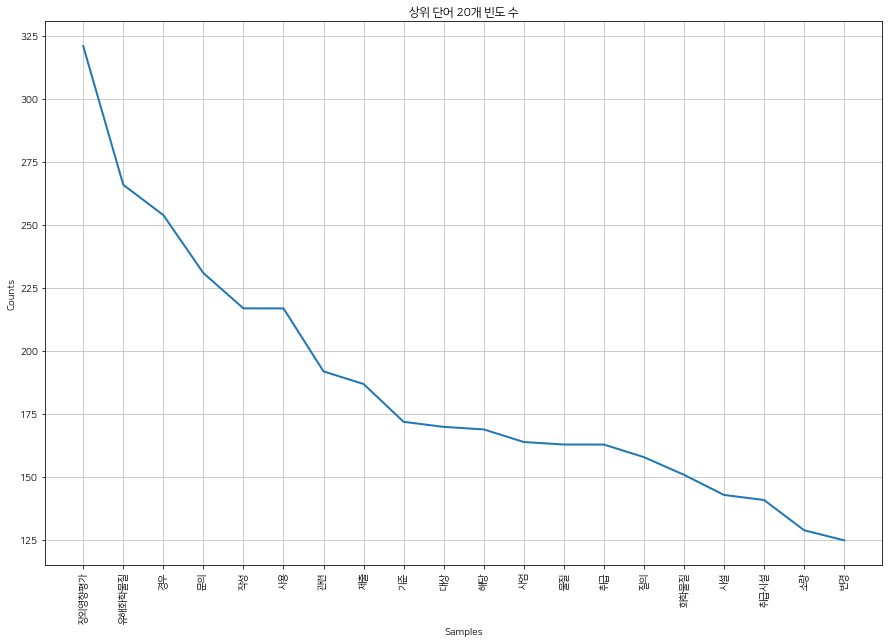

총 고유단어 개수: 2928
총 토큰(단어)의 개수 20855
최빈 단어-가장 많이 나온 단어: 장외영향평가
최빈 단어의 빈도수: 321
총토큰수 대비 최빈단어의 비율: 0.015391992327978901


In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm #한글 설정


## 해당 과의 단어 빈도 계산
word_list = []
for i in df['word']:
    word_list.extend(i)
    
frequency = Text(word_list, name='단어 빈도 수')



font_location = 'C:/WINDOWS/Fonts/NanumSquare.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)


plt.figure(figsize=(15,10))
plt.title('상위 단어 20개 빈도 수')
frequency.plot(20) #빈도수 상위 20개 단어를 선그래프로 그린다.

plt.show()

fd_frequency = frequency.vocab()
print('총 고유단어 개수:', fd_frequency.B())
print('총 토큰(단어)의 개수', fd_frequency.N())
print('최빈 단어-가장 많이 나온 단어:', fd_frequency.max())
print('최빈 단어의 빈도수:', fd_frequency.get(fd_frequency.max()))
print('총토큰수 대비 최빈단어의 비율:', fd_frequency.freq(fd_frequency.max()))

In [40]:
# 파일로 출력
frequency_list = fd_frequency.most_common(fd_frequency.B()) 
pd.DataFrame(frequency_list, columns=['word', 'count']).to_csv('./사고예방심사1과_단어_빈도수.csv', index = False, encoding = "utf-8-sig")

### 단어 상관도 분석

In [6]:
df['word']

0    [질의, 이수자, 작성자, 군민, 수정, 추가, 화학사고예방관리계획서, 영향, 경우...
0    [보관, 질의, 원료, 함유, 창고, 용량, 화학물질, 제조, 조사, 연간, 배출,...
0    [붕산, 당사, 작성, 현재, 유독물질, 선택, 신규, 사용, 지정, 검색, 관련,...
0    [보관, 설치, 앵글, 선반, 발부, 창고, 크기, 저장탱크, 잉크, 회신, 용량,...
0    [배관, 펌프, 작성, 대비, 포드, 교체, 대리, 확인, 설계, 회사, 검사, 문...
                           ...                        
0    [재제출, 분석, 포함, 변경, 장외, 모두, 경우, 하나요, 제출, 저희, 묶음,...
0    [사업, 질의, 이상, 시설, 처리, 규칙, 확인, 증설, 기재, 장외, 해당, 조...
0    [보관, 배관, 시설, 체류, 용량, 전체, 설계, 인지, 산정, 정의, 최대, 법...
0    [황산니켈, 보관, 식품, 판단, 시설, 과정, 용량, 석조, 치가, 가정, 와중,...
0    [저장탱크, 확보, 사고대비물질, 제출, 후속, 사이즈, 위치, 나머지, 이후, 과...
Name: word, Length: 451, dtype: object

In [7]:
y_data = df['word']

In [8]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
mlb.fit(y_data)

print(mlb.classes_) # 등장한 모든 단어
print(len(mlb.classes_))

['가가' '가게' '가격' ... '흥미' '희망' '힐링']
2928


In [9]:
data = mlb.transform(y_data)
df_data = pd.DataFrame(data,columns=[mlb.classes_])
df_data

,가가,가게,가격,가공,가공업,가공품,가기,가능,가능성,가도,...,후의,휘발,휴대,흄후드,흐름,흡수,흡입,흥미,희망,힐링
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
449,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# 관계가 1에 가깝다는 것은: 두 단어가 자주 같이 출현한다는 것
# 관계가 -1에 가깝다는 것은: 두 단어가 아주 드물게 출현 혹은 겹치는 영역이 없다는 것
correlation = df_data.corr() #상관계수
correlation

,가가,가게,가격,가공,가공업,가공품,가기,가능,가능성,가도,...,후의,휘발,휴대,흄후드,흐름,흡수,흡입,흥미,희망,힐링
가가,1.000000,-0.002222,-0.003858,-0.002222,-0.002222,-0.002222,-0.002222,-0.009041,-0.004991,-0.002222,...,-0.003146,-0.002222,-0.002222,-0.002222,-0.004991,-0.002222,-0.004459,-0.002222,-0.002222,-0.002222
가게,-0.002222,1.000000,-0.003858,-0.002222,-0.002222,-0.002222,-0.002222,-0.009041,-0.004991,-0.002222,...,-0.003146,-0.002222,-0.002222,-0.002222,-0.004991,-0.002222,-0.004459,-0.002222,-0.002222,-0.002222
가격,-0.003858,-0.003858,1.000000,-0.003858,-0.003858,-0.003858,-0.003858,-0.015694,0.251846,-0.003858,...,-0.005462,-0.003858,-0.003858,-0.003858,-0.008664,-0.003858,-0.007741,0.576066,-0.003858,-0.003858
가공,-0.002222,-0.002222,-0.003858,1.000000,-0.002222,-0.002222,-0.002222,-0.009041,0.445222,-0.002222,...,-0.003146,-0.002222,-0.002222,-0.002222,-0.004991,-0.002222,-0.004459,-0.002222,-0.002222,-0.002222
가공업,-0.002222,-0.002222,-0.003858,-0.002222,1.000000,-0.002222,-0.002222,-0.009041,-0.004991,-0.002222,...,-0.003146,-0.002222,-0.002222,-0.002222,-0.004991,-0.002222,-0.004459,-0.002222,-0.002222,-0.002222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
흡수,-0.002222,-0.002222,-0.003858,-0.002222,-0.002222,-0.002222,-0.002222,-0.009041,-0.004991,-0.002222,...,-0.003146,-0.002222,-0.002222,-0.002222,-0.004991,1.000000,-0.004459,-0.002222,-0.002222,-0.002222
흡입,-0.004459,-0.004459,-0.007741,-0.004459,-0.004459,-0.004459,-0.004459,0.109704,-0.010016,-0.004459,...,-0.006313,-0.004459,-0.004459,-0.004459,-0.010016,-0.004459,1.000000,-0.004459,-0.004459,-0.004459
흥미,-0.002222,-0.002222,0.576066,-0.002222,-0.002222,-0.002222,-0.002222,-0.009041,0.445222,-0.002222,...,-0.003146,-0.002222,-0.002222,-0.002222,-0.004991,-0.002222,-0.004459,1.000000,-0.002222,-0.002222
희망,-0.002222,-0.002222,-0.003858,-0.002222,-0.002222,-0.002222,-0.002222,-0.009041,-0.004991,-0.002222,...,-0.003146,-0.002222,-0.002222,-0.002222,-0.004991,-0.002222,-0.004459,-0.002222,1.000000,-0.002222


In [139]:
correlation.to_csv('./word_correlation.csv', index = True, encoding = "utf-8-sig")

In [11]:
#한 번에 출력 여러 번 시키기위한 라이브러리 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

In [108]:
#한줄 테스트용
    
    key ='가게'
    word = correlation[key]
    word = word.drop([key], axis=0) # 자기 자신과 같은 단어 제거
    filters = word[key] >= 0.6 # 상관 계수가 0.6 이상인 것만 필터링
    
    word = word[filters].dropna() #결측치 제거
    word = word.sort_values((key,), ascending = False)
    word_top5 = word.iloc[0:5]
    word_top5 = word_top5.transpose() # 가로 세로 뒤집기
    len(word_top5.columns)
    if len(word_top5.columns) > 0:
        word_top5
    


5

,골드,본드,헛소리,판매점,철물
가게,1.0,1.0,1.0,1.0,1.0


In [33]:
file_name = './out_correlation.csv'

for key in mlb.classes_ :
    word = correlation[key]
    word = word.drop([key], axis=0) # 자기 자신과 같은 단어 제거
    filters = word[key] >= 0.6 # 상관 계수가 0.6 이상인 것만 필터링
    
    word = word[filters].dropna() #결측치 제거
    word = word.sort_values((key,), ascending = False) # 정렬
    word_top10 = word.iloc[0:10]        # 상위 단어 10개만 선택
    word_top10 = word_top10.transpose() # 가로 세로 뒤집기
    
    if len(word_top10.columns) > 0:     # 상관 관계가 없는 단어(행) 제거
        word_top10.to_csv(file_name, mode = 'a', encoding="utf-8-sig") # 상위 10개만 csv 파일로 
        word_top10

,가추,간사
가가,1.0,1.0


,골드,본드,헛소리,판매점,철물,집앞,일절,구멍,우리나라,몇번
가게,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,교육장,기계로,력기,매트릭스,소나,용해,응고,조기,커팅,커팅하
가공,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,일류,인지도
가공업,0.706321,0.706321


,건욕,건욕함,달동,달뒤,목표,산세,석조
가공품,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,각의,합산량
가도,1.0,1.0


,경기,청주,위로,의심,이시종,일이,전남,지킴,참여,청주시
가드,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,비례,기상
가령,1.0,0.706321


,가로세로,고정식,국제연합,그림문자,남지,사원,세로,스트로,시행일,이사
가로,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가로,고정식,국제연합,그림문자,남지,사원,세로,스트로,시행일,이사
가로세로,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,간혈,구내식당,단시간,세제,인산,나목,에탄올,소독
가목,0.704735,0.704735,0.704735,0.704735,0.704735,0.675355,0.608255,0.608255


,고압
가스,0.609334


,저울,행정절차,화기
가스용기,0.706321,0.706321,0.706321


,미확정,평의,마무리,오히려
가시,1.0,1.0,0.706321,0.706321


,냉동,대기압,도씨,변수,비점,살균제,실온,주석,하의,도의
가압,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,격실,발열,식료품,음식,적하,추레라,탑차,헤드,화물차,성질
가연성물질,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,귀책사유,다음해,소속,도의,본인,안정,오픈,전송
가운데,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,양인,익산시,전라북도,라서,무작정,백만원,수업,이진행,컨설팅비
가이드라인,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,가해,범죄,카톡,카카오,악용,아이디,극단,살인,반대,바램
가입,0.865058,0.865058,0.865058,0.865058,0.865058,0.865058,0.865058,0.865058,0.865058,0.865058


,가가,간사
가추,1.0,1.0


,갑질,거절,한마디,태도,태권,클립,친절,직위,직도,직급
가치,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,한상태,극단,카톡,카카오,던데,악용,아이디,바램,반대,살인
가해,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,리가,계산법
각각으로,1.0,0.706321


,가도,합산량
각의,1.0,1.0


,가가,가추
간사,1.0,1.0


,용구,방호벽,대략,보강
간의,1.0,0.706321,0.706321,0.706321


,급량
간취,1.0


,구내식당,단시간,세제,인산,소독,에탄올,보건관리,가목,지도,의뢰
간혈,1.0,1.0,1.0,1.0,0.865058,0.865058,0.772866,0.704735,0.651725,0.651725


,현대,반듯이,읍니,유도,우린,요소,예측,영광,시비,거론
갈수,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,역량,집수조,확충
감시,0.706321,0.706321,0.706321


,마을,분포,갑설,부록,개소,정화,지형
감안,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,개미산,병행,사이렌,센서,트렌지,파렛트,포집,트렌,누액
감지,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,배기
감지기,0.70553


,갈수,소프트웨어,영광,예측,요소,거론,유도,읍니,이론,일전
감히,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,굴착,터널,도급,종점,장대,상대자,설계도,함위,정산,입찰
갑설,0.815587,0.815587,0.815587,0.815587,0.815587,0.706321,0.706321,0.706321,0.706321,0.706321


,을종,제곱미터
갑종,0.671947,0.630339


,가치,거절,한마디,태도,태권,클립,친절,직위,직도,직급
갑질,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,강철,금속성,내식성,내열성,방유,분당,역장,유출량,입시,차용
강도,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,강제,순응,최하,처사,압박,금은,시청,사이버,배출량,매입
강의,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,강의,순응,최하,처사,압박,금은,시청,사이버,배출량,매입
강제,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,강도,금속성,내식성,내열성,방유,분당,역장,유출량,입시,차용
강철,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,발부,상향,앵글,주제,질량,포스코,하중,선반,박스,잉크
강판,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,기밀,댐퍼,동작,봉쇄,살수장치,지기,출감,출입구,폐액,창문
개구,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,개점,소명,거래처,시오,신용,실수,아마,여파,조사만,조제
개도,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,거부,넘버,당일,리스크,부여,선별,스트림,응시,종별,프로젝트
개략,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,감지,병행,사이렌,센서,트렌지,파렛트,포집,트렌,누액
개미산,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,기초,진흥
개발,0.662928,0.662928


,거레되지않,상등,수사,신경,징역,해주시,물건,몇몇,캡쳐
개설,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,정화,터널,굴착,도급,종점,장대,불산누출,격무,차선,지번
개소,1.0,0.815587,0.815587,0.815587,0.815587,0.815587,0.706321,0.706321,0.706321,0.706321


,숫자
개수,0.664435


,교재,대규모,도나,도산,입력값,한글파일,고가,그때
개시,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,고증,긍정,단축,대폭,류지연,막대,명인,부접,시엔,아우성
개월,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,마스크,방폭,폭하,폭등,콘센트,조명,전기,연관,보호장구,환기
개인보호장구,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,개도,소명,거래처,시오,신용,실수,아마,여파,조사만,조제
개점,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,공정수,냉각,부제목,수냉식,크류,냉동기,냉매
개조,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,에피,디메,틸포름,다이어그램,더라도,롯데,수석,정밀,한상훈
개중,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,금요일,수리,요청서,프로세스,종이,여개
개편,1.0,1.0,1.0,1.0,0.706321,0.706321


,관심,무상,상대,연하,이구,정작,트레이드,게시판,물품,미성년
갤러리,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,얼마나
거기,0.664435


,개도,소명,개점,시오,신용,실수,아마,여파,조사만,조제
거래처,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,개설,상등,수사,신경,징역,해주시,물건,몇몇,캡쳐
거레되지않,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,갈수,소프트웨어,영광,예측,요소,우린,유도,읍니,이론,일전
거론,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,외벽
거리,0.65058


,개략,넘버,당일,리스크,부여,선별,스트림,응시,종별,프로젝트
거부,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가치,갑질,한마디,태도,태권,클립,친절,직위,직도,직급
거절,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,롯데,수석,정밀,한상훈
건강,0.630339,0.630339,0.630339,0.630339


,누수,매립,명확,지상화,선행,지상
건건,1.0,1.0,1.0,1.0,0.706321,0.706321


,기상
건만,0.706321


,가공품,건욕함,달동,달뒤,목표,산세,석조
건욕,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,여러가지
건욕시,0.706321


,가공품,건욕,달동,달뒤,목표,산세,석조
건욕함,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,결부,량산,샘플링,압축기,중늘,측정값,검지,유정
건일,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,시위,오븐,건조기,기름,냉장고,버너,열교환기,열량,컨베이어,트레
건조,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,기름,냉장고,버너,열교환기,열량,컨베이어,트레,구간,매체,건조
건조기,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,마치
건축,0.70553


,국토
건축법,0.747763


,번영,사정
검시,0.706321,0.706321


,마비,혈세,공란,나노,명목,부족,불능,산적,수반,완비
검증,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,복합,시안화수소,황화수소,휴대,건일,결부,량산,샘플링,압축기,중늘
검지,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,고정용,기구,메틸알코올,병상,이소프로필알코올,포름알데히드
검체,1.0,1.0,1.0,1.0,1.0,0.706321


,금액,내외,서면,시공,시화공단,시흥시,영세,위함,종종,중요
것이므,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,생기,아무나,뿐더러
것입,1.0,1.0,0.706321


,갤러리,관심,무상,상대,연하,이구,정작,트레이드
게시판,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,레벨,여분,유체,의아,진액,평시,후렌,안이
게이지,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,갈수,소프트웨어,영광,예측,요소,우린,유도,읍니,이론,일전
게임기,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,구연산
겨우,1.0


,구청,국범,하동,포털,주소지,인터네셔널,유성,여타,에나,등본
격리,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,계기,구미,부산물,부와,불산누출,일련,일만,지번,차선,횟수
격무,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가연성물질,발열,식료품,음식,적하,추레라,탑차,헤드,화물차,성질
격실,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,공존,구의,요기,재차,조류,하부,혼돈,이처럼,구가,이점
결구,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,건일,량산,샘플링,압축기,중늘,측정값,검지,유정
결부,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,대로,목별,억제,절기,첨가,석유,부칙,진심,한편
결빙,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,부칙
경과,0.706321


,가드,청주,위로,의심,이시종,일이,전남,지킴,참여,청주시
경기,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,금액,종종,시화공단,시흥시,영세,공직자,엄포,허위,충남,지시
경기도,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,가드,청주,위로,의심,이시종,일이,전남,지킴,참여,청주시
경남,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,원인,박사학위
경력,0.630339,0.630339


,사본,서울,소문,수수료,자동차관리법,시내,대답,요즘,과거,몇몇
경비,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,경은,고글,시민,안경,어지러움,장시간,콘택트렌즈,한적,호소,착용
경사이,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,경사이,고글,시민,안경,어지러움,장시간,콘택트렌즈,한적,호소,착용
경은,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,과도,기저귀,필름,포기,패턴,차감,중소기업,조로,조각,접착제
경제,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,갈수,소프트웨어,영광,예측,요소,우린,유도,읍니,이론,일전
경험,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,격무,구미,부산물,부와,불산누출,일련,일만,지번,차선,횟수
계기,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,편법,각각으로,리가
계산법,0.706321,0.706321,0.706321


,상관관계,유정
계수,0.772866,0.630339


,계장,양압,진공,접합,인버터,읍압,고장,연동장치,음압,압운
계시,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,교부,당초,상대자,설계도,입찰,정산,함위,환경법,갑설,발주
계약서,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,부의,사인,선인,준면,행복
계열,1.0,1.0,1.0,1.0,1.0


,계시,양압,진공,접합,인버터,읍압,고장,연동장치,음압,압운
계장,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,완결,행정,자일렌
계측기,1.0,0.706321,0.706321


,오염,제거
계통,1.0,0.630339


,그때,가치,직도,원칙,윗사람,저리,주의,주일,직급,직위
고가,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,경사이,경은,시민,안경,어지러움,장시간,콘택트렌즈,한적,호소,착용
고글,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,장임,번영,연속,유틸리티,주소
고기,1.0,0.706321,0.706321,0.706321,0.706321


,비량
고량,0.706321


,누출사고,빈도,점수
고로,1.0,1.0,1.0


,바이오,이윤정,형제,믹스,과거,안이
고무,1.0,1.0,1.0,0.706321,0.706321,0.706321


,생시
고발,0.815587


,구사,흄후드,구두
고법,1.0,1.0,0.706321


,부원,수출입,일간,첨가제,무량,전념,참작
고서,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,구글링,입법,하단,하위,참고자료,두번째,발간
고안,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,가스
고압,0.609334


,분해,불소,원자,지식
고온,0.706321,0.706321,0.706321,0.706321


,이황화탄소
고유,1.0


,법해
고자,1.0


,계시,양압,진공,접합,인버터,읍압,계장,연동장치,음압,압운
고장,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,개도,소명,개점,시오,신용,실수,아마,여파,조사만,조제
고전,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,덮개,호흡
고정,0.630339,0.630339


,가로,가로세로,국제연합,그림문자,남지,사원,세로,스트로,시행일,이사
고정식,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,검체,기구,메틸알코올,병상,이소프로필알코올,포름알데히드
고정용,1.0,1.0,1.0,1.0,1.0,0.706321


,류지연,개월
고증,1.0,0.706321


,공무원,국내법,뿌리,여러분,형사,위법,대표자
고함,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,가게,본드,헛소리,판매점,철물,집앞,일절,구멍,우리나라,몇번
골드,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,영업비밀
공개,0.664435


,상거래,실물,쓰기,주문,발주,유통업,통상,교내
공고,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,공법,괸리를,나튜,미생물,사단법인,수산화,시로,시료,위임,의현
공공,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,더군다나,도대체,무료,배송비,부가세,우체국택배,을해,이벤트,주스,초고
공구,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,수반,산적,적지,자원,완비,나노,최선,증량,정보없음,불능
공란,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,구형,궁굼합니,금회,둘레,망가니즈,망간,모니터링,반지름,소진,유량계
공무,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,고함,국내법,뿌리,여러분,형사,위법,대표자
공무원,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,시료,수산화,종말,전무,자금,인천광역시,의현,위임,괸리를,시로
공법,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,바보,붙이,인후,정식,팔고,세금,타당,통관,물건
공병,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,분자,유기물,유기,무기,시안,부득이
공신,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,항수,엔진오일,개도,시오,학업,하루하루,투잡,컴맹,징수,종은
공인,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,개조,냉각,부제목,수냉식,크류,냉동기,냉매
공정수,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,이나
공정위,0.706321


,만타,본적
공조,1.0,0.706321


,결구,구의,요기,재차,조류,하부,혼돈,이처럼,구가,이점
공존,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,전송
공지,0.630339


,신뢰,그러케,허위,충남,지시,정반대,은하면,용인시,요망,오지
공직자,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,조직
공통,0.664435


,가드,청주,위로,의심,이시종,일이,전남,지킴,참여,청주시
공포,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,경비,고무,바이오,이윤정,형제,사본,서울,소문,수수료,자동차관리법
과거,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,이의,시트,조로,조각,접착제,재회,패턴,인쇄,유효,원단
과도,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,전입,장관,준공
과로,1.0,0.706321,0.706321


,끼리,대의,호기
과시,1.0,0.706321,0.706321


,기화,발전소,상주,소수,음표,질소,환원제,출구,산화물,이격
과압,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,다인,뭐합,생산자,엉망,절실,합리,복구,성과,내면
과연,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,귀사,덕일,방청,배정,원주지방환경청,정지훈,주지,처리기
과장,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,가치,갑질,한마디,태도,태권,클립,친절,직위,직도,직급
과장꼐,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,증기압
과제,0.664435


,데이터베이스,인대,초래,하나로,호환,호환성,회사정보,인적,중지,업데이트
과중,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,개도,소명,개점,시오,신용,실수,아마,여파,조사만,조제
과태,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가드,청주,위로,의심,이시종,일이,전남,지킴,참여,청주시
과학,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,대학,귀부,대통령령,령제,마목,만인,명미,전담,정보통신부,실습
과학기술,0.815587,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,미제,소개,여지,연말,일차,잡기,당장,만원,주관
관계자,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,부두,분기,석유화학,잔량,퀴놀린,타르
관내,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,지방
관서,0.794123


,밀수,법도,중국,커뮤니티,폭리,프로,부당,광고,시장,위반
관세,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,갤러리,무상,상대,연하,이구,정작,트레이드,게시판,물품,미성년
관심,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,극히,범주,서랍,소비,재사용,전자메일,케비넷,필연
관청,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,관세,밀수,법도,중국,커뮤니티,폭리,프로
광고,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,법정,부실,버튼,전송,클릭,팝업창,통상
괴리된,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,구글,유발,환경문제,츄팝,체제,지구온난화,주로,점도,이산화탄소,육불화황
괴물,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,시료,수산화,종말,전무,자금,인천광역시,의현,위임,공법,시로
괸리를,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,공고,상거래,실물,쓰기,기회,대학교,보육,어차피,여건,창업
교내,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,디논,살충제,생활,방역,롤리
교반기,0.815587,0.815587,0.815587,0.664435,0.664435


,계약서,당초,상대자,설계도,입찰,정산,함위,환경법,갑설,발주
교부,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,작성자
교육,0.642083


,리시버,상압,세어도,집의,카운팅,이건
교육대상,1.0,1.0,1.0,1.0,1.0,0.706321


,가공,기계로,력기,매트릭스,소나,용해,응고,조기,커팅,커팅하
교육장,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,개시,대규모,도나,도산,입력값,한글파일,고가,그때
교재,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,이점,혼돈,요기,하부,구의,재차,조류,결구,공존,조제
구가,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,건조기,기름,냉장고,버너,열교환기,열량,컨베이어,트레
구간,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,괴물,유발,환경문제,츄팝,체제,지구온난화,주로,점도,이산화탄소,육불화황
구글,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,고안,입법,하단,하위,참고자료,두번째,발간
구글링,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,간혈,단시간,세제,인산,소독,에탄올,보건관리,가목,지도,의뢰
구내식당,1.0,1.0,1.0,1.0,0.865058,0.865058,0.772866,0.704735,0.651725,0.651725


,비커,주사기,증류수,채취,고법,구사,흄후드
구두,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,가게,본드,헛소리,판매점,철물,집앞,일절,골드,우리나라,몇번
구멍,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,기인,증상
구문,1.0,1.0


,격무,계기,부산물,부와,불산누출,일련,일만,지번,차선,횟수
구미,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,고법,흄후드,구두
구사,1.0,1.0,0.706321


,금액,시화공단,시흥시,영세,종종,불가능,입증,치면,호수
구상,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,등록증,대표자,매각,보험
구성원,1.0,0.706321,0.706321,0.706321


,겨우
구연산,1.0


,결구,공존,요기,재차,조류,하부,혼돈,이처럼,구가,이점
구의,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,배상,운용,중타,환경오염
구제,1.0,0.706321,0.706321,0.706321


,격리,국범,하동,포털,주소지,인터네셔널,유성,여타,에나,등본
구청,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,대입,성상,구해
구하라,0.706321,0.706321,0.706321


,듣기,아질산나트륨,사면,실린더
구한,0.706321,0.706321,0.706321,0.706321


,구하라,괴물,유튜버들,환경문제,츄팝,체제,지구온난화,주로,점도,이산화탄소
구해,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,심의,정보공개
구현,1.0,0.706321


,궁굼합니,둘레,반지름,정사각형,형성,벽면,공무,길이,깊이,여개
구형,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,고함,공무원,뿌리,여러분,형사,위법,대표자
국내법,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,환경과학
국립,0.815587


,브랜드,영문
국문,1.0,1.0


,격리,구청,하동,포털,주소지,인터네셔널,유성,여타,에나,등본
국범,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,재포,포장재
국제,1.0,1.0


,가로,가로세로,고정식,그림문자,남지,사원,세로,스트로,시행일,이사
국제연합,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,건축법
국토,0.747763


,가게,본드,헛소리,판매점,철물,집앞,일절,골드,우리나라,몇번
군데,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,신문고
군민,1.0


,나무,지표면,도시,지형,정량,전원
굴곡,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,가드,청주,위로,의심,이시종,일이,전남,지킴,참여,청주시
굴뚝,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,도급,장대,종점,터널,연장,갑설,개소,정화,도로,용역
굴착,1.0,1.0,1.0,1.0,0.865058,0.815587,0.815587,0.815587,0.772866,0.664435


,플라스틱,탈크,케미칼,안티몬,오일,금회,정용,코발트,정운영,유량계
궁굼,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,구형,둘레,반지름,정사각형,형성,벽면,공무,길이,깊이,여개
궁굼합니,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,일일이,응대,회선,행시,처분,징계,전환,전화회선,단체,일부러
권한,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,대통령령,령제,마목,만인,명미,전담,정보통신부,과학기술,단서,유형
귀부,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,과장,덕일,방청,배정,원주지방환경청,정지훈,주지,처리기
귀사,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,가운데,다음해,소속,도의,본인,안정,오픈,전송
귀책사유,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,마력,만하,먼지,분쇄,삽입,항만,효과,순차
귀청,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,자꾸,상법,설법,이오
귀하,0.706321,0.706321,0.706321,0.706321


,내압시험,이지연,포드,플루
규산,1.0,1.0,1.0,1.0


,산소,수렴,실란,취할,화학반응식,노출,반응속도
규소,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,말함
규직,0.706321


,시행
규칙,0.659352


,더욱,머리
그냥,0.630339,0.630339


,가드,청주,위원,의심,이시종,인프라,일이,전남,지킴,참여
그동안,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,고가,가치,직도,원칙,윗사람,저리,주의,주일,직급,직위
그때,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,마련,망입,벤츄,연재,지붕,출입문,피뢰침,동의,사전,창문
그라스,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,연사,킬로,된장,부문,항문,항시
그램,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,신뢰,공직자,허위,충남,지시,정반대,은하면,용인시,요망,오지
그러케,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,동영상,붙여넣기,캐드,메뉴얼
그리기,1.0,1.0,1.0,0.706321


,밸트,의왕시,입출,청계,축하,취해,더라도
그린,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,넓이,맨홀,재산,직경
그림,0.706321,0.706321,0.706321,0.706321


,가로,가로세로,고정식,국제연합,남지,사원,세로,스트로,시행일,이사
그림문자,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,한상태,가해,카톡,카카오,던데,악용,아이디,바램,반대,살인
극단,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,범주,서랍,소비,재사용,전자메일,케비넷,필연,한편,관청,실의
극히,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,안영준,표면처리
금속,0.630339,0.630339


,강도,강철,내식성,내열성,방유,분당,역장,유출량,입시,차용
금속성,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,시화공단,시흥시,영세,종종,구상,경기도,불량,조그만,화공,것이므
금액,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,개편,수리,요청서,프로세스,종이,여개
금요일,1.0,1.0,1.0,1.0,0.706321,0.706321


,강의,순응,최하,처사,압박,강제,시청,사이버,배출량,매입
금은,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,엑셀,수기,추정,업로드
금주,0.772866,0.664435,0.664435,0.651725


,망가니즈,망간,모니터링,소진,유량계,정용,정운영,코발트,화학반응,산화물
금회,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,간취
급량,1.0


,흡입
급성,0.753388


,단축,대폭,막대,명인,부접,시엔,아우성,위원,인프라,합본
긍정,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,사학,졸업,컨설팅회사,무경
기계공학,1.0,1.0,1.0,0.706321


,가공,교육장,력기,매트릭스,소나,용해,응고,조기,커팅,커팅하
기계로,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,난이,원인
기관지,1.0,0.706321


,검체,고정용,메틸알코올,병상,이소프로필알코올,포름알데히드
기구,1.0,1.0,1.0,1.0,1.0,0.706321


,자격증,학위,전자공학,토목공학,자도,기사,소지,전공
기능사,0.815587,0.815587,0.706321,0.706321,0.706321,0.70553,0.70553,0.630339


,다행,문상,뭔갈,밤새,살피,상담사,얼른,업주,운송차량,을시
기도,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,내화,두번쨰,서술,원론,전인,제원,토목공사,파기
기둥,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,낱개,독시,본연,식당,멸균,부어,의료기기,자외,장착,출고
기류,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,건조기,냉장고,버너,열교환기,열량,컨베이어,트레,구간,매체,건조
기름,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,개구,댐퍼,동작,봉쇄,살수장치,지기,출감,출입구,폐액,창문
기밀,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,자격증,기능사,원인
기사,0.865058,0.70553,0.70553


,건만,가령,비례
기상,0.706321,0.706321,0.706321


,가치,갑질,한마디,태도,태권,클립,친절,직위,직도,직급
기색,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,소유자,이글,화학공학,박사학위,자재,무경
기술사,1.0,1.0,1.0,0.706321,0.706321,0.706321


,갈수,소프트웨어,영광,예측,요소,우린,유도,읍니,이론,일전
기술자,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,부설
기업,0.744037


,안정,부하,실정
기업체,0.815587,0.664435,0.664435


,산시,울주군,임득,평상시,피트,후단,증기
기와,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,무궁,발전
기원,0.924779,0.843257


,구문,증상
기인,1.0,1.0


,이의,시트,조로,조각,접착제,재회,패턴,인쇄,유효,원단
기저귀,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,보일러,비정,연료,전지,충진
기적,1.0,1.0,1.0,0.706321,0.706321


,서동민,통지
기제,1.0,0.706321


,진흥,살기,실과,협소하,인정,부설,개발
기초,1.0,0.70553,0.70553,0.70553,0.703936,0.662928,0.662928


,과압,발전소,상주,소수,음표,질소,환원제,출구,산화물,이격
기화,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,대학교,보육,어차피,여건,창업,교내
기회,1.0,1.0,1.0,1.0,1.0,0.706321


,마감,서브,확인가능
긴급,1.0,1.0,0.706321


,구형,궁굼합니,둘레,반지름,소유권,심화,정사각형,직선,형성
길이,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,일본,폐사,희망,물품,완제
김상민,1.0,1.0,1.0,0.706321,0.706321


,신뢰,공직자,허위,충남,지시,정반대,은하면,용인시,요망,오지
김인희,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,동강,의료법,재단
김태훈,1.0,1.0,1.0


,강도,강철,토출량,차용,정사각형,입시,유출량,역장,분당,방유
깊이,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,발화점,인화점,중점,학질,일치,성은,성과,한계
끓는점,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,순위,대입
끝점,1.0,0.706321


,과시,대의,호기
끼리,1.0,0.706321,0.706321


,일쑤,이어도,한강유역환경청,하순,피드백,지장,잠정,보류,한인,알리
나기,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,수반,산적,적지,자원,완비,공란,최선,증량,정보없음,불능
나노,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,외주,컨설팅사,주관,조속,통계청,서버,스크린샷
나라,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,갈수,소프트웨어,영광,예측,요소,우린,유도,읍니,이론,일전
나름,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가치,갑질,한마디,태도,태권,클립,친절,직위,직도,직급
나마,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가목
나목,0.675355


,굴곡,지표면,도시,지형,정량,전원
나무,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,방제,사내,사후관리,성변화,소산,시서로,여서,자동화,자등,체계
나열,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,시료,수산화,종말,전무,자금,인천광역시,의현,위임,공법,시로
나튜,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,퍼센트
나트륨,0.706321


,기관지,원인
난이,1.0,0.706321


,터미널,설마,예규
날로,0.706321,0.706321,0.706321


,반응속도
날씨,0.815587


,지난주,시일,컨설팅업체,나마,갑질,가치,기색,과장꼐,거절,한마디
날인,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,문상,상담사,업그레이드,업주,을시,타고
날짜,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,능동,단내,물소,소화,소화전,완성,제인,태양,합성,화전
남동,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가로,가로세로,고정식,국제연합,그림문자,사원,세로,스트로,시행일,이사
남지,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,개도,소명,개점,시오,신용,실수,아마,여파,조사만,조제
납부,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,시간
낭비,0.605453


,기류,독시,본연,식당,멸균,부어,의료기기,자외,장착,출고
낱개,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,요쳥,과연,다인,뭐합,생산자,엉망,절실,합리
내면,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,강도,강철,금속성,내열성,방유,분당,역장,유출량,입시,차용
내식성,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,규산,이지연,포드,플루
내압시험,1.0,1.0,1.0,1.0


,부수
내야,0.706321


,강도,강철,금속성,내식성,방유,분당,역장,유출량,입시,차용
내열성,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,서면,시공,위함,중요,행정고시,증발,것이므,만족
내외,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,전지,충진
내장,0.815587,0.815587


,서술,원론,기둥
내화,1.0,1.0,0.706321


,개조,공정수,부제목,수냉식,크류,냉동기,냉매
냉각,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,가압,대기압,도씨,변수,비점,살균제,실온,주석,하의,도의
냉동,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,냉매,개조,공정수,냉각,부제목,수냉식,크류,보충
냉동기,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,냉동기,개조,공정수,냉각,부제목,수냉식,크류,보충
냉매,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,건조기,기름,버너,열교환기,열량,컨베이어,트레,구간,매체,건조
냉장고,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,맨홀,재산,직경,그림,뚜껑,파일명
넓이,1.0,1.0,1.0,0.706321,0.706321,0.706321


,개략,거부,당일,리스크,부여,선별,스트림,응시,종별,프로젝트
넘버,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,카페,쪽지,가해,극단,던데,바램,반대,범죄,살인,아이디
네이버,0.717464,0.662579,0.608946,0.608946,0.608946,0.608946,0.608946,0.608946,0.608946,0.608946


,안영준,부위
넷재,0.706321,0.706321


,매제,반영구,산소,수렴,실란,용접,취할,화학반응식,규소
노출,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,방향,해주시
노후,0.706321,0.706321


,상온,이불,플루오르화수소,전해질,가공,필렛트,커팅하,커팅,조기,응고
녹는점,0.815587,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,가게,본드,헛소리,판매점,철물,집앞,일절,골드,우리나라,몇번
농약,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,갈수,요소,합니,차제,정의도,정답,전략,장난감,자세,자부심
누가,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,마음,가해,극단,던데,바램,반대,범죄,살인,아이디,악용
누구,0.893426,0.772866,0.772866,0.772866,0.772866,0.772866,0.772866,0.772866,0.772866,0.772866


,건건,매립,명확,지상화,선행,지상
누수,1.0,1.0,1.0,1.0,0.706321,0.706321


,감지,개미산,탐지기,병행,사이렌,센서,트렌지,파렛트,포집
누액,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,개구,기밀,댐퍼,동작,봉쇄,살수장치,지기,출감,출입구,폐액
누출량,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,고로,빈도,점수
누출사고,1.0,1.0,1.0


,남동,단내,물소,소화,소화전,완성,제인,태양,합성,화전
능동,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,불법,쪽지
니코틴,0.661638,0.615836


,미사,에탄,염화
니트릴,1.0,1.0,0.706321


,샤워,세안
다라,0.70553,0.70553


,가운데,귀책사유,소속,도의,본인,안정,오픈,전송
다음해,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,개중,에피
다이어그램,0.706321,0.706321


,과연,뭐합,생산자,엉망,절실,합리,복구,성과,내면
다인,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,뭔갈,밤새,살피,얼른,운송차량,저번,출발,사전,기도,이제
다행,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,남동,능동,물소,소화,소화전,완성,제인,태양,합성,화전
단내,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,두건,설마,예규,초산,카스
단독,0.706321,0.706321,0.706321,0.706321,0.706321


,대통령령,령제,마목,만인,명미,전담,정보통신부,귀부,생태계,제제
단서,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,권한,단체,당사자,변명,불통,응대,일부러,일일이,전화회선,전환
단속,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,간혈,구내식당,세제,인산,소독,에탄올,보건관리,가목,지도,의뢰
단시간,1.0,1.0,1.0,1.0,0.865058,0.865058,0.772866,0.704735,0.651725,0.651725


,토출측,자주
단어,0.706321,0.706321


,수산,우일,이충호
단장,1.0,1.0,1.0


,권한,응대,회선,행시,처분,징계,전환,전화회선,일부러,일일이
단체,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,긍정,대폭,막대,명인,부접,시엔,아우성,위원,인프라,합본
단축,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가공품,건욕,건욕함,달뒤,목표,산세,석조
달동,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,가공품,건욕,건욕함,달동,목표,산세,석조
달뒤,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,시내
달라,0.70553


,사안,우편물,통화시,보름,세트,씌어,요령,호스
달이,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,시인
답신,1.0


,권한,응대,회선,행시,처분,징계,전환,전화회선,일부러,일일이
당사자,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,개략,거부,넘버,리스크,부여,선별,스트림,응시,종별,프로젝트
당일,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,데이타,똑바로,번식,베이스,분식,시대,차후,미제,소개,여지
당장,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,계약서,교부,상대자,설계도,입찰,정산,함위,환경법,갑설,발주
당초,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,라서,무작정,백만원,수업,시일,이진행,컨설팅비,컨설팅업체,대전
대구,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.70553


,개시,교재,도나,도산,입력값,한글파일,고가,그때
대규모,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,가압,냉동,도씨,변수,비점,살균제,실온,주석,하의,도의
대기압,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,임대차,주인,저촉
대기업,1.0,1.0,0.706321


,덮개,호흡
대기오염,0.70553,0.70553


,불철,주야,경비,사본,서울,소문,수수료,자동차관리법,라서,무작정
대답,0.815587,0.815587,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,악취,탈취,대의,스크러버
대당,1.0,1.0,0.706321,0.706321


,간의,강도,강철,금속성,내식성,내열성,방유,분당,역장,용구
대략,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,결빙,목별,억제,절기,첨가,석유,부칙,진심,한편
대로,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,부주의,분실,통지서,본사,보안
대리점,1.0,1.0,0.706321,0.706321,0.706321


,스케줄
대만,1.0


,상수도,적정,충시,에칭,표면처리,실행,취소
대면,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,공법,괸리를,나튜,미생물,사단법인,수산화,시로,시료,위임,의현
대상자,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,최악
대안,0.638752


,박사학위
대응,0.630339


,과시,끼리,대당,악취,탈취
대의,0.706321,0.706321,0.706321,0.706321,0.706321


,구하라,끝점,순위
대입,0.706321,0.706321,0.706321


,격리,구청,하동,포털,주소지,인터네셔널,유성,여타,에나,등본
대장,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,유성구,대구
대전,0.70553,0.70553


,격리,구청,하동,포털,주소지,인터네셔널,유성,여타,에나,등본
대전광역시,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,로젠택배,오토바이,운송업,통운,트럭,특송,한진택배,우체국,등기,이나
대중,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,밀봉,수단,파손,소비자,만큼,충격
대중교통,1.0,1.0,1.0,0.706321,0.706321,0.706321


,신뢰,공직자,허위,충남,지시,정반대,은하면,용인시,요망,오지
대충,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,귀부,령제,마목,만인,명미,전담,정보통신부,과학기술,단서,유형
대통령령,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,긍정,단축,막대,명인,부접,시엔,아우성,위원,인프라,합본
대폭,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,공직자,십자,허위,충남,지시,정반대,은하면,용인시,요망,오지
대표이사,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,고함,공무원,구성원,국내법,등록증,뿌리,여러분,형사
대표자,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,과학기술
대학,0.815587


,기회,보육,어차피,여건,창업,교내
대학교,1.0,1.0,1.0,1.0,1.0,0.706321


,발생량,수축,절대값,덮개,호흡,평균
대학원,1.0,1.0,1.0,0.706321,0.706321,0.706321


,감히,살기,실과,협소하
대한민국,0.630339,0.630339,0.630339,0.630339


,개구,기밀,동작,봉쇄,살수장치,지기,출감,출입구,폐액,창문
댐퍼,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,공구,도대체,무료,배송비,부가세,우체국택배,을해,이벤트,주스,초고
더군다나,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,그린,밸트,의왕시,입출,청계,축하,취해,개중,에피
더라도,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,머리,자부심,요소,우린,유도,읍니,이론,일전,일종,갈수
더욱,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,과장,귀사,방청,배정,원주지방환경청,정지훈,주지,처리기
덕일,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,한상태,가해,극단,카톡,카카오,악용,아이디,바램,반대,살인
던데,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,호흡,대학원,량위,발생량,수축,절대값,대기오염,고정
덮개,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.70553,0.630339


,약용,위해시
데이,1.0,1.0


,똑바로,번식,베이스,분식,시대,차후,당장,마다,장애
데이타,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,인식,공란,나노,명목,부족,불능,산적,수반,완비,자원
데이터,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,과중,인대,초래,하나로,호환,호환성,회사정보,인적,중지,업데이트
데이터베이스,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,굴착,장대,종점,터널,연장,갑설,개소,정화,도로,용역
도급,1.0,1.0,1.0,1.0,0.865058,0.815587,0.815587,0.815587,0.772866,0.664435


,개시,교재,대규모,도산,입력값,한글파일,고가,그때
도나,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,공구,더군다나,무료,배송비,부가세,우체국택배,을해,이벤트,주스,초고
도대체,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가치,갑질,한마디,태도,태권,클립,친절,직위,직도,직급
도데,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,도색,도심,배경,비행기,상업,서문,소이,이이,전반,주차장
도래,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,굴착,도급,장대,종점,터널,연장,갑설,개소,정화
도로,0.772866,0.772866,0.772866,0.772866,0.772866,0.667566,0.630339,0.630339,0.630339


,살기,실과,협소하,방화,수검,여야
도록,0.815587,0.815587,0.815587,0.664435,0.664435,0.664435


,야합,정비공
도료,1.0,1.0


,가게,알선,한시,판매점,철물,집앞,일절,우리나라,에스,알티
도매,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,메틸에틸케톤,안산,페닐메탄,상수
도법,1.0,1.0,1.0,0.706321


,개시,교재,대규모,도나,입력값,한글파일,고가,그때
도산,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,도래,도심,배경,비행기,상업,서문,소이,이이,전반,주차장
도색,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,지표면,굴곡,나무,가드,청중,전남,지킴,참여,청주,청주시
도시,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,장인,생시,두번째,주성철
도식,1.0,0.706321,0.706321,0.706321


,도래,도색,배경,비행기,상업,서문,소이,이이,전반,주차장
도심,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가압,냉동,대기압,변수,비점,살균제,실온,주석,하의,도의
도씨,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,슬라이딩,지타,판넬,건조기,기름,냉장고,버너,열교환기,열량,컨베이어
도어,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,결구,공존,구의,요기,재차,조류,차등,철도,하부,항공기
도움,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,가운데,귀책사유,다음해,소속,가압,냉동,대기압,도씨,변수,비점
도의,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,가치,원칙,한마디,태도,태권,클립,친절,직위,직도,직급
도장,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,혈세,마비,격리,여타,하동,포털,주소지,인터네셔널,유성,에나
도저히,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,갈수,소프트웨어,영광,예측,요소,우린,유도,읍니,이론,일전
도전,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가드,청주,위로,의심,이시종,일이,전남,지킴,참여,청주시
도지사,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,사안,우편물,통화시,반입,상사,실용,알선,알티,에스,한시
도착,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,가해,극단,던데,바램,반대,범죄,살인,아이디,악용,카카오
독극물,0.772866,0.772866,0.772866,0.772866,0.772866,0.772866,0.772866,0.772866,0.772866,0.772866


,비유
독물,1.0


,기류,낱개,본연,식당,멸균,부어,의료기기,자외,장착,출고
독시,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,괴물,유발,환경문제,츄팝,체제,지구온난화,주로,점도,이산화탄소,육불화황
독자,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,개도,소명,개점,시오,신용,실수,아마,여파,조사만,조제
독촉,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,김태훈,의료법,재단
동강,1.0,1.0,1.0


,개도,소명,개점,시오,신용,실수,아마,여파,조사만,조제
동남아시아,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,강도,강철,금속성,내식성,내열성,방유,분당,역장,유출량,입시
동등,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,동의
동명,0.706321


,명과,물질상태,상귀,상일,영양,행업
동안,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,그리기,붙여넣기,캐드,메뉴얼
동영상,1.0,1.0,1.0,0.706321


,그라스,동명,마련,망입,벤츄,연재,지붕,출입문,피뢰침
동의,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,개구,기밀,댐퍼,봉쇄,살수장치,지기,출감,출입구,폐액,창문
동작,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,이의,시트,조로,조각,접착제,재회,패턴,인쇄,유효,원단
동판,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,부문,항문,항시,부수,그램
된장,1.0,1.0,1.0,0.706321,0.706321


,초산,카스,단독
두건,1.0,1.0,0.706321


,도식,장인,고안,구글링,입법,하단,하위
두번째,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,전인,제원,토목공사,파기,기둥,조소
두번쨰,1.0,1.0,1.0,1.0,0.706321,0.706321


,분해,불소,원자,지식
두서,0.706321,0.706321,0.706321,0.706321


,구형,궁굼합니,반지름,정사각형,형성,벽면,공무,길이,깊이,여개
둘레,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,첫째
둘째,1.0


,신뢰,공직자,허위,충남,지시,정반대,은하면,용인시,요망,오지
드보라,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,아질산나트륨,구한
듣기,1.0,0.706321


,메티,물법,파레트,혼재
듭니,1.0,1.0,1.0,1.0


,터미널,가드,이시종,합동,탄산가스,코로,치의,충북도청,충북,청중
등급,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,대중,로젠택배,오토바이,운송업,통운,트럭,특송,한진택배
등기,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,격리,구청,하동,포털,주소지,인터네셔널,유성,여타,에나,등본
등기부,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,갈수,요소,합니,차제,정의도,정답,전략,장난감,자세,자부심
등등,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,구성원,대표자,매각,보험
등록증,1.0,0.706321,0.706321,0.706321


,격리,구청,하동,포털,주소지,인터네셔널,유성,여타,에나,등기부
등본,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,설립,활성화
등세,0.706321,0.706321


,저울,수급
등재,0.706321,0.706321


,살충제,생활,방역,롤리,교반기,발급,의사,있으므,증명서,생략
디논,1.0,1.0,0.815587,0.815587,0.815587,0.706321,0.706321,0.706321,0.706321,0.630339


,틸포름,아미드,개중,에피,예비,오기
디메,1.0,0.815587,0.706321,0.706321,0.706321,0.706321


,이의,시트,조로,조각,접착제,재회,패턴,인쇄,유효,원단
디자인,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,최단
디졸버,0.706321


,이익,스토어,플레이,팩토리,통신,코리아,이프,레전드,하이네,스코키
디케이,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,데이타,번식,베이스,분식,시대,차후,당장,마다,장애
똑바로,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,넓이,맨홀,재산,직경
뚜껑,0.706321,0.706321,0.706321,0.706321


,계시,양압,진공,접합,인버터,읍압,계장,연동장치,음압,압운
뜰뜸,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,이의,시트,조로,조각,접착제,재회,패턴,인쇄,유효,원단
라미,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,무작정,백만원,수업,이진행,컨설팅비,대구,대답,여러가지,투자,행정기관
라서,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,소시,아이
라이,1.0,1.0


,디케이,레전드,쇼핑,스마트,스코키,스토어,스핑,이드,이익,이프
라이드,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,갈수,요소,합니,차제,정의도,정답,전략,장난감,자세,자부심
래야,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,건일,결부,샘플링,압축기,중늘,측정값,검지,유정
량산,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,덮개,호흡
량위,0.706321,0.706321


,게이지,여분,유체,의아,진액,평시,후렌,안이
레벨,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,사전
레이,0.815587


,디케이,스코키,플레이,팩토리,통신,코리아,이프,스토어,이익,스마트
레전드,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가공,교육장,기계로,매트릭스,소나,용해,응고,조기,커팅,커팅하
력기,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,귀부,대통령령,마목,만인,명미,전담,정보통신부,과학기술,단서,유형
령제,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,자산,현항,매각,소유,실의
로간,1.0,1.0,0.706321,0.706321,0.706321


,부두,분기,석유화학,잔량,퀴놀린,타르,무한,바탕,밤낮,일명
로딩,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,가드,경기,합동,탄산가스,코로,치의,충북도청,충북,청중,청주시
로메,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,대중,오토바이,운송업,통운,트럭,특송,한진택배,우체국,등기,이나
로젠택배,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,디논,살충제,생활,방역,교반기
롤리,0.815587,0.815587,0.815587,0.664435,0.664435


,수석,정밀,한상훈,개중,에피,여름,건강
롯데,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.630339


,고증,개월
류지연,1.0,0.706321


,각각으로,계산법
리가,1.0,0.706321


,개략,거부,넘버,당일,부여,선별,스트림,응시,종별,프로젝트
리스크,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,교육대상,상압,세어도,집의,카운팅,이건
리시버,1.0,1.0,1.0,1.0,1.0,0.706321


,긴급,서브,확인가능
마감,1.0,1.0,0.706321


,강도,분당,차후,차용,입시,유출량,역장,시대,분식,베이스
마다,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,이의,시트,조로,조각,접착제,재회,패턴,인쇄,유효,원단
마당,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,귀청,만하,먼지,분쇄,삽입,항만,효과,순차
마력,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,그라스,망입,벤츄,연재,지붕,출입문,피뢰침,동의,사전,창문
마련,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,귀부,대통령령,령제,만인,명미,전담,정보통신부,과학기술,단서,유형
마목,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,가시,미확정,평의,비어
마무리,0.706321,0.706321,0.706321,0.706321


,혈세,세금,검증,도저히,스트레스,전산
마비,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,개인보호장구,방폭,폭하,폭등,콘센트,조명,전기,연관,보호장구,환기
마스크,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,감안,분포,갑설,부록,개소,정화,지형
마을,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,누구,살인,범죄,카톡,카카오,악용,아이디,가해,한상태,반대
마음,0.893426,0.865058,0.865058,0.865058,0.865058,0.865058,0.865058,0.865058,0.865058,0.865058


,시료,씌어,향정,종말,전무,자금,인천광역시,의현,위임,요령
마치,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,가게,본드,헛소리,판매점,철물,집앞,일절,골드,우리나라,몇번
마트,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,긍정,단축,대폭,명인,부접,시엔,아우성,위원,인프라,합본
막대,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,반제품,유의,한순간,반응속도,속도,진행중,만족,중화
만들기,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,사안,우편물,통화시,미제,소개,여지,연말,일차,잡기,관계자
만원,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,귀부,대통령령,령제,마목,명미,전담,정보통신부,과학기술,단서,유형
만인,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,세척제
만일,0.630339


,만들기,반제품,유의,한순간,내외,서면,시공,위함,중요,행정고시
만족,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,과도,유효,필름,포기,패턴,파손,차감,중소기업,조로,조각
만큼,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,공조,본적
만타,1.0,0.706321


,귀청,마력,먼지,분쇄,삽입,항만,효과,순차
만하,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,괴물,유발,환경문제,츄팝,체제,지구온난화,주로,점도,이산화탄소,육불화황
만행,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,주신,지난번
말씀,0.630339,0.630339


,신뢰,공직자,허위,충남,지시,정반대,은하면,용인시,요망,오지
말입,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,규직,공란,나노,명목,부족,불능,산적,수반,완비,자원
말함,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,금회,망간,모니터링,소진,유량계,정용,정운영,코발트,화학반응,산화물
망가니즈,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,금회,망가니즈,모니터링,소진,유량계,정용,정운영,코발트,화학반응,산화물
망간,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,그라스,마련,벤츄,연재,지붕,출입문,피뢰침,동의,사전,창문
망입,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,로간,자산,현항,구성원,등록증
매각,0.706321,0.706321,0.706321,0.706321,0.706321


,용어
매뉴얼,0.664435


,건건,누수,명확,지상화,선행,지상
매립,1.0,1.0,1.0,1.0,0.706321,0.706321


,강의,순응,최하,처사,압박,강제,시청,사이버,배출량,금은
매입,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,반영구,용접,노출,전지,충진,출입,정제,제의,부속품
매제,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,기름,트레,냉장고,컨베이어,버너,열량,건조기,열교환기,가압,실온
매체,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,강의,강제,금은,매입,반물질,배출량,사이버,수의,순응,시청
매출,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,가공,교육장,기계로,력기,소나,용해,응고,조기,커팅,커팅하
매트릭스,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,넓이,재산,직경,그림,뚜껑,파일명
맨홀,1.0,1.0,1.0,0.706321,0.706321,0.706321


,더욱,갈수,자부심,요소,우린,유도,읍니,이론,일전,일종
머리,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,갈수,영광,요소,우린,유도,읍니,이론,일전,일종,자부심
먹통,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,귀청,마력,만하,분쇄,삽입,항만,효과,순차
먼지,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,베너,워드,메뉴얼,실행,클릭
메뉴,1.0,1.0,0.706321,0.706321,0.706321


,용법,그리기,동영상,메뉴,베너,붙여넣기,워드,캐드
메뉴얼,0.815587,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,안보,캡처,화면,좌표
메세지,1.0,1.0,1.0,0.706321


,산화제,질산암모늄,초기,한화,차원,보이
메인,1.0,1.0,1.0,1.0,0.706321,0.706321


,듭니,물법,파레트,혼재
메티,1.0,1.0,1.0,1.0


,검체,고정용,기구,병상,이소프로필알코올,포름알데히드
메틸알코올,1.0,1.0,1.0,1.0,1.0,0.706321


,도법,안산,페닐메탄,상수
메틸에틸케톤,1.0,1.0,1.0,0.706321


,가치,갑질,한마디,태도,태권,클립,친절,직위,직도,직급
면박,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,개도,소명,개점,시오,신용,실수,아마,여파,조사만,조제
면치,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,부어,의료기기,자외,장착,출고,플라즈마,기류,낱개,독시,본연
멸균,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,물질상태,상귀,상일,영양,행업,동안,출입
명과,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,수반,산적,적지,자원,완비,공란,최선,증량,정보없음,불능
명목,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,귀부,대통령령,령제,마목,만인,전담,정보통신부,과학기술,단서,유형
명미,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,부항,여력,성문
명세서,1.0,1.0,0.706321


,관세,밀수,법도,중국,커뮤니티,폭리,프로
명의,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,긍정,단축,대폭,막대,부접,시엔,아우성,위원,인프라,합본
명인,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,건건,누수,매립,지상화,선행,지상
명확,1.0,1.0,1.0,1.0,0.706321,0.706321


,개설,거레되지않,상등,수사,신경,징역,경비,사본,서울,소문
몇몇,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,가게,본드,헛소리,판매점,철물,집앞,일절,골드,우리나라,마트
몇번,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,금회,망가니즈,망간,소진,유량계,정용,정운영,코발트,화학반응,산화물
모니터링,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,괴물,유발,환경문제,츄팝,체제,지구온난화,주로,점도,이산화탄소,육불화황
모방,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,갈수,소프트웨어,영광,예측,요소,우린,유도,읍니,이론,일전
모사,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가드,청주,위로,의심,이시종,일이,전남,지킴,참여,청주시
모습,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,결빙,대로,억제,절기,첨가,석유,부칙,진심,한편
목별,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,신뢰,공직자,허위,충남,지시,정반대,은하면,용인시,요망,오지
목포시,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가공품,건욕,건욕함,달동,달뒤,산세,석조
목표,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,송부,유감,주말,절대,중순,퇴근
몹시,1.0,1.0,1.0,0.706321,0.706321,0.706321


,기계공학,사학,졸업,컨설팅회사,기술사,소유자,이글,화학공학,자로
무경,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.630339


,기원,발전
무궁,0.924779,0.727019


,시안,공신,분자,유기물,퍼센트,화합물
무기,1.0,0.706321,0.706321,0.706321,0.706321,0.630339


,전념,참작,위반,고서
무량,1.0,1.0,0.706321,0.706321


,괴물,유발,환경문제,츄팝,체제,지구온난화,주로,점도,이산화탄소,육불화황
무려,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,공구,더군다나,도대체,배송비,부가세,우체국택배,을해,이벤트,주스,초고
무료,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,공란,세트,요령,씌어,나노,호스,보름,명목,산적,불능
무리,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,갤러리,관심,상대,연하,이구,정작,트레이드,게시판,물품,미성년
무상,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,자신
무슨,0.70553


,갈수,거론,합니,차제,정의도,정답,전략,장난감,자세,자부심
무시,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,라서,백만원,수업,이진행,컨설팅비,대구,대답,여러가지,투자,행정기관
무작정,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,강의,강제,금은,매입,반응챔버,배출량,사이버,순응,시청,압박
무조건,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,바탕,밤낮,일명,프로판,외로,로딩,사양
무한,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,중량,포장
묶음,0.864077,0.623831


,상담사,업주,을시,타고,행정기관,기도,날짜
문상,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,격리,구청,국범,대장,대전광역시,등기부,등본,에나,여타,유성
문서,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,괴물,구글,이산화탄소,이어도,일쑤,잠정,점도,주로,지구온난화,지장
문제점,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,개설,거레되지않,상등,수사,신경,징역,공병,바보,붙이,인후
물건,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,듭니,메티,파레트,혼재
물법,1.0,1.0,1.0,1.0


,갈수,소프트웨어,영광,예측,요소,우린,유도,읍니,이론,일전
물성,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,남동,능동,단내,소화,소화전,완성,제인,태양,합성,화전
물소,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,명과,상귀,상일,영양,행업,동안,출입
물질상태,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,우이,성은
물징,1.0,0.706321


,김상민,일본,폐사,희망,갤러리,관심,무상,상대,연하,이구
물품,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,과연,다인,생산자,엉망,절실,합리,복구,성과,내면
뭐합,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,다행,밤새,살피,얼른,운송차량,저번,출발,사전,기도,이제
뭔갈,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,미수,보편,본의,에이
미반,1.0,1.0,1.0,1.0


,니트릴,에탄,염화
미사,1.0,1.0,0.706321


,시료,수산화,종말,전무,자금,인천광역시,의현,위임,공법,시로
미생물,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,갤러리,관심,무상,상대,연하,이구,정작,트레이드
미성년,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,미반,보편,본의,에이
미수,1.0,1.0,1.0,1.0


,파일럿
미적,1.0


,관계자,소개,여지,연말,일차,잡기,당장,만원,주관
미제,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,지아,인근,이격,지상
미터,1.0,0.706321,0.706321,0.706321


,가시,평의,마무리,오히려
미확정,1.0,1.0,0.706321,0.706321


,형제,이윤정,바이오,고무,합금,필렛트,커팅하,커팅,조기,가공
믹스,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,대중교통,수단,파손,소비자,만큼,충격
밀봉,1.0,1.0,1.0,0.706321,0.706321,0.706321


,관세,법도,중국,커뮤니티,폭리,프로,부당,광고,시장,위반
밀수,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,상호,칸막이
바닥,0.664435,0.664435


,한상태,가해,극단,카톡,카카오,던데,악용,아이디,반대,살인
바램,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,공병,붙이,인후,정식,팔고,세금,타당,통관,물건
바보,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,뿐더러
바뿔,0.706321


,고무,이윤정,형제,믹스,과거,안이
바이오,1.0,1.0,1.0,0.706321,0.706321,0.706321


,가치,갑질,한마디,태도,태권,클립,친절,직위,직도,직급
바인더,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,무한,밤낮,일명,프로판,외로,로딩,사양
바탕,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,기술사,소유자,이글,화학공학,대응,경력,자로
박사학위,0.706321,0.706321,0.706321,0.706321,0.630339,0.630339,0.630339


,세로,사원,이사,시행일,스트로,흡수,남지,그림문자,가로세로,국제연합
박스,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,한상태,가해,극단,카톡,카카오,던데,악용,아이디,바램,살인
반대,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,괴물,유튜버,환경문제,츄팝,체제,지구온난화,주로,점도,이산화탄소,육불화황
반도체,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,가해,극단,던데,바램,반대,범죄,살인,아이디,악용,카카오
반드시,0.608946,0.608946,0.608946,0.608946,0.608946,0.608946,0.608946,0.608946,0.608946,0.608946


,갈수,소프트웨어,영광,예측,요소,우린,유도,읍니,이론,일전
반듯이,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,수의,일수,일체,매출
반물질,1.0,1.0,0.706321,0.706321


,매제,용접,노출,전지,충진,출입,정제,제의,부속품
반영구,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,날씨,만들기,반제품,유의,한순간,산소,수렴,실란,취할,화학반응식
반응속도,0.815587,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,챔버,연속,무조건
반응챔버,1.0,0.706321,0.706321


,상사,실용,알선,알티,에스,한시,통관,도매,부산,도착
반입,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,만들기,유의,한순간,반응속도,속도,진행중,만족,중화
반제품,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,구형,궁굼합니,둘레,정사각형,형성,벽면,공무,길이,깊이,여개
반지름,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,멸균,부어,의료기기,자외,장착,출고,플라즈마,고안,구글링,입법
발간,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,의사,있으므,증명서,디논,살충제,생활
발급,1.0,1.0,1.0,0.706321,0.706321,0.706321


,강판,상향,앵글,주제,질량,포스코,하중,선반,박스,잉크
발부,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,대학원,수축,절대값,덮개,호흡,평균
발생량,1.0,1.0,1.0,0.706321,0.706321,0.706321


,택배
발송,0.677476


,가드,청주,위로,의심,이시종,일이,전남,지킴,참여,청주시
발암,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가연성물질,격실,식료품,음식,적하,추레라,탑차,헤드,화물차,성질
발열,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,기원,무궁
발전,0.843257,0.727019


,과압,기화,상주,소수,음표,질소,환원제,출구,산화물,이격
발전소,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,공고,상거래,실물,쓰기,계약서,교부,당초,상대자,설계도,입찰
발주,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,가드,청주,위로,의심,이시종,일이,전남,지킴,참여,청주시
발표,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,시흥,도장,진행중
발행,1.0,0.706321,0.706321


,끓는점,인화점,중점,학질,일치,성은,성과,한계
발화점,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,무한,바탕,일명,프로판,외로,로딩,사양
밤낮,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,다행,뭔갈,살피,얼른,운송차량,저번,출발,사전,기도,이제
밤새,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,트렌치
방류벽,0.638752


,안전성,확보
방안,0.611963,0.608491


,디논,살충제,생활,롤리,교반기
방역,0.815587,0.815587,0.815587,0.664435,0.664435


,강도,강철,금속성,내식성,내열성,분당,역장,유출량,입시,차용
방유,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,분도,질다,부족함,산성,알칼리성,이중,포괄
방재,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,나열,사내,사후관리,성변화,소산,시서로,여서,자동화,자등,체계
방제,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,과장,귀사,덕일,배정,원주지방환경청,정지훈,주지,처리기
방청,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,개인보호장구,마스크,폭하,폭등,콘센트,조명,전기,연관,보호장구,환기
방폭,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,격무,계기,구미,부산물,부와,불산누출,일련,일만,지번,차선
방향,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,간의,용구,콘크리트
방호벽,0.706321,0.706321,0.706321


,살기,실과,협소하,도록,수검,여야
방화,0.815587,0.815587,0.815587,0.664435,0.664435,0.664435


,도래,도색,도심,비행기,상업,서문,소이,이이,전반,주차장
배경,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,개구,기밀,댐퍼,동작,봉쇄,살수장치,지기,출감,출입구,폐액
배기,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,구제,운용,중타,환경오염
배상,1.0,0.706321,0.706321,0.706321


,공구,더군다나,도대체,무료,부가세,우체국택배,을해,이벤트,주스,초고
배송비,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,과장,귀사,덕일,방청,원주지방환경청,정지훈,주지,처리기
배정,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,강의,순응,최하,처사,압박,강제,시청,사이버,매입,금은
배출량,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,조립,완제,보지
배터리,1.0,0.706321,0.706321


,계시,양압,진공,접합,인버터,읍압,계장,연동장치,음압,압운
배풍량,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,라서,무작정,수업,이진행,컨설팅비,대구,대답,여러가지,투자,행정기관
백만원,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,신뢰,공직자,허위,충남,지시,정반대,은하면,용인시,요망,오지
백옥,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,그린,의왕시,입출,청계,축하,취해,더라도
밸트,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,건조기,기름,냉장고,열교환기,열량,컨베이어,트레,구간,매체,건조
버너,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,법정,괴리된,부실,개도,신용,실수,아마,여파,조사만,조제
버튼,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,데이타,똑바로,베이스,분식,시대,차후,당장,마다,장애
번식,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,검시,고기,장임
번영,0.706321,0.706321,0.706321


,캡쳐
벌금,0.70553


,용로,특별,패널,상수,안영준
벌칙,1.0,1.0,1.0,0.706321,0.706321


,오산화인
범용,1.0


,영향
범위,0.723245


,한상태,가해,극단,카톡,카카오,던데,악용,아이디,바램,반대
범죄,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,극히,서랍,소비,재사용,전자메일,케비넷,필연,한편,관청,실의
범주,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,관세,밀수,중국,커뮤니티,폭리,프로,부당,광고,시장,위반
법도,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,조성
법률,0.643074


,괴리된,부실,버튼,전송,클릭,팝업창,통상
법정,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,고자
법해,1.0


,메뉴,워드,메뉴얼,실행,클릭
베너,1.0,1.0,0.706321,0.706321,0.706321


,데이타,똑바로,번식,분식,시대,차후,당장,마다,장애
베이스,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,개인보호장구,마스크,방폭,보호장구,연관,연환,전기,조금,조명,콘센트
벤젠,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,그라스,마련,망입,연재,지붕,출입문,피뢰침,동의,사전,창문
벤츄,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,구형,궁굼합니,둘레,반지름,정사각형,형성,한쪽
벽면,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,권한,응대,회선,행시,처분,징계,전환,전화회선,일부러,일일이
변명,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가압,냉동,대기압,도씨,비점,살균제,실온,주석,하의,도의
변수,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,개소,정화
별개,0.70553,0.70553


,움포,임상병리사,진검
병리,1.0,1.0,1.0


,검체,고정용,기구,메틸알코올,이소프로필알코올,포름알데히드
병상,1.0,1.0,1.0,1.0,1.0,0.706321


,의료
병원,0.750792


,감지,개미산,사이렌,센서,트렌지,파렛트,포집,트렌,누액
병행,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,간의,자부심,우린,유도,읍니,이론,일전,일종,자세,갈수
보강,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,세제,인산,간혈,구내식당,단시간,에탄올,소독,의료
보건관리,0.772866,0.772866,0.772866,0.772866,0.772866,0.667566,0.667566,0.627479


,소의
보관장,0.667566


,가드,청주,위로,의심,이시종,일이,전남,지킴,참여,청주시
보기,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가드,청주,위로,의심,이시종,일이,전남,지킴,참여,청주시
보도,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,나기,이어도,한강유역환경청,하순,피드백,지장,잠정,일쑤,알리,싯점
보류,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,세트,씌어,요령,호스,부속품,달이,마치,무리,수도,완공
보름,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,대리점,부주의,분실,시민,안경,어지러움,장시간,콘택트렌즈,한적,호소
보안,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,기회,대학교,어차피,여건,창업,교내
보육,1.0,1.0,1.0,1.0,1.0,0.706321


,메인,산화제,질산암모늄,초기,한화
보이,0.706321,0.706321,0.706321,0.706321,0.706321


,괴물,유발,환경문제,츄팝,체제,지구온난화,주로,점도,이산화탄소,육불화황
보이지,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,기적,비정,연료,전지,충진
보일러,1.0,1.0,1.0,0.706321,0.706321


,생태계,제제,개략,거부,넘버,당일,리스크,부여,선별,스트림
보전,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,환절기,처리기,진심
보존,1.0,0.706321,0.706321


,가게,골드,구멍,군데,농약,마트,몇번,배터리,본드,우리나라
보지,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,냉동기,냉매,순환
보충,0.706321,0.706321,0.706321


,미반,미수,본의,에이
보편,1.0,1.0,1.0,1.0


,인수,구성원,등록증,상법,설법,이오,사무실
보험,0.815587,0.706321,0.706321,0.706321,0.706321,0.706321,0.70553


,을종,외벽
보호대,0.676948,0.660858


,개인보호장구,마스크,폭하,폭등,콘센트,조명,전기,연관,방폭,환기
보호장구,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,과연,엉망,다인,뭐합,합리,절실,생산자,체계,자등,자동화
복구,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,시안화수소,황화수소,휴대,검지,일산화탄소,측정기
복합,1.0,1.0,1.0,0.706321,0.706321,0.706321


,가게,골드,헛소리,판매점,철물,집앞,일절,우리나라,몇번,마트
본드,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,대리점,부주의,분실,이불,전해질,플루오르화수소
본사,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,기류,낱개,독시,식당,멸균,부어,의료기기,자외,장착,출고
본연,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,미반,미수,보편,에이
본의,1.0,1.0,1.0,1.0


,가운데,일부러,회선,행시,처분,징계,전환,전화회선,일일이,응대
본인,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,갈수,자부심,우린,유도,읍니,이론,일전,일종,자세,거론
본적,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,개구,기밀,댐퍼,동작,살수장치,지기,출감,출입구,폐액,창문
봉쇄,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,개도,소명,개점,시오,신용,실수,아마,여파,조사만,조제
부가,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,공구,더군다나,도대체,무료,배송비,우체국택배,을해,이벤트,주스,초고
부가세,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,만원
부과,0.70553


,관세,중국,밀수,법도,프로,폭리,커뮤니티,플레이,팩토리,통신
부당,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,분기,석유화학,잔량,퀴놀린,타르,로딩,관내
부두,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,격리,공신,하동,포털,주소지,인터네셔널,유성,유기물,여타,에나
부득이,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,상반,차감,용액량,이의,아세테이트,인쇄,재회,접착제,시트,조각
부디,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,신뢰,공직자,허위,충남,지시,정반대,은하면,용인시,요망,오지
부로,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,수법,탐독,포인트,감안,마을,분포
부록,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,된장,항문,항시,부수,그램
부문,1.0,1.0,1.0,0.706321,0.706321


,터미널,반입,상사,실용,알선,알티,에스,한시
부산,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,격무,계기,구미,부와,불산누출,일련,일만,지번,차선,횟수
부산물,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,연구소,기업,기초,진흥
부설,0.797236,0.744037,0.662928,0.662928


,보름,세트,씌어,요령,호스,매제,반영구,용접
부속품,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,내야,된장,부문,항문,항시
부수,0.706321,0.706321,0.706321,0.706321,0.706321


,샤워,세안
부식,0.630339,0.630339


,괴리된,법정,버튼,전송,클릭,팝업창,통상
부실,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,멸균,의료기기,자외,장착,출고,플라즈마,기류,낱개,독시,본연
부어,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,개략,거부,넘버,당일,리스크,선별,스트림,응시,종별,프로젝트
부여,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,격무,계기,구미,부산물,불산누출,일련,일만,지번,차선,횟수
부와,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,수출입,일간,첨가제,고서,연구자
부원,1.0,1.0,1.0,0.706321,0.706321


,넷재
부위,0.706321


,계열,사인,선인,준면,행복
부의,1.0,1.0,1.0,1.0,1.0


,안정
부적,0.630339


,집수,최저
부적합,0.706321,0.706321


,긍정,단축,대폭,막대,명인,시엔,아우성,위원,인프라,합본
부접,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,개조,공정수,냉각,수냉식,크류,냉동기,냉매
부제목,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,수반,산적,자원,완비,공란,증량,정보없음,적지,불능,최선
부족,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,산성,알칼리성,이중,포괄,방재
부족함,1.0,1.0,1.0,1.0,0.706321


,대리점,분실,통지서,본사,보안
부주의,1.0,1.0,0.706321,0.706321,0.706321


,결빙,경과,대로,목별,억제,절기,첨가
부칙,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,안정,기업체
부하,0.815587,0.664435


,명세서,여력,성문
부항,1.0,1.0,0.706321


,부두,석유화학,잔량,퀴놀린,타르,로딩,관내
분기,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,강도,강철,금속성,내식성,내열성,방유,역장,유출량,입시,차용
분당,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,질다,방재
분도,1.0,0.706321


,공법,괸리를,나튜,미생물,사단법인,수산화,시로,시료,위임,의현
분말,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,실시간,전단
분서,1.0,1.0


,귀청,마력,만하,먼지,삽입,항만,효과,순차
분쇄,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,데이타,똑바로,번식,베이스,시대,차후,당장,마다,장애
분식,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,대리점,부주의,통지서,본사,보안
분실,1.0,1.0,0.706321,0.706321,0.706321


,공신,유기물,유기,무기,시안,부득이
분자,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,감안,마을,갑설,부록,개소,정화,지형
분포,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,슬라이딩,지타,판넬,승계
분할,0.706321,0.706321,0.706321,0.706321


,불소,원자,지식,고온,불화수소,불화수소산,두서
분해,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,입증,치면,호수,출하,투어,구상,사각형,알기,트렌
불가능,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,신재생에너지,주성분,합성가스,일산화탄소,연구시설,전시
불규칙,1.0,1.0,1.0,0.706321,0.706321,0.706321


,수반,산적,자원,완비,공란,증량,정보없음,적지,부족,최선
불능,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,화공,금액,영세,시화공단,종종,시흥시,하루하루,투잡,컴맹,징수
불량,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,니코틴
불법,0.661638


,괴물,유발,환경문제,츄팝,체제,지구온난화,주로,점도,이산화탄소,육불화황
불법행위,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,격무,계기,구미,부산물,부와,일련,일만,지번,차선,횟수
불산누출,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,분해,원자,지식,고온,불화수소,불화수소산,두서
불소,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,사표
불이익,0.608255


,주야,대답
불철,1.0,0.815587


,가치,갑질,한마디,태도,태권,클립,친절,직위,직도,직급
불쾌,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,권한,응대,회선,행시,처분,징계,전환,전화회선,일부러,일일이
불통,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,괴물,유발,환경문제,츄팝,체제,지구온난화,주로,점도,이산화탄소,육불화황
불화,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,불화수소산,이불,전해질,플루오르화수소,분해,불소,원자,지식
불화수소,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,불화수소,이불,전해질,플루오르화수소,분해,불소,원자,지식
불화수소산,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,그리기,동영상,캐드,메뉴얼
붙여넣기,1.0,1.0,1.0,0.706321


,공병,바보,인후,정식,팔고,세금,타당,통관,물건
붙이,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,국문,영문
브랜드,1.0,1.0


,수도권매립지
브레인,1.0


,고량
비량,0.706321


,가령,기상
비례,1.0,0.706321


,실드
비산,0.815587


,마무리
비어,0.706321


,독물
비유,1.0


,궁굼
비율,0.70553


,가압,냉동,대기압,도씨,변수,살균제,실온,주석,하의,도의
비점,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,기적,보일러,연료,전지,충진
비정,1.0,1.0,1.0,0.706321,0.706321


,주사기,증류수,채취,구두
비커,1.0,1.0,1.0,0.706321


,도래,도색,도심,배경,상업,서문,소이,이이,전반,주차장
비행기,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,고로,누출사고,점수
빈도,1.0,1.0,1.0


,고함,공무원,국내법,여러분,형사,위법,대표자
뿌리,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,것입,생기,아무나,바뿔
뿐더러,0.706321,0.706321,0.706321,0.706321


,불가능,이동만,이동해,입증,철제,치면,호수
사각형,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,살인,반대,카톡,카카오,악용,아이디,가해,범죄,한상태,바램
사건,0.865058,0.865058,0.865058,0.865058,0.865058,0.865058,0.865058,0.865058,0.865058,0.865058


,가치,갑질,한마디,태도,태권,클립,친절,직위,직도,직급
사과,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,나열,방제,사후관리,성변화,소산,시서로,여서,자동화,자등,체계
사내,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,시료,수산화,종말,전무,자금,인천광역시,의현,위임,공법,시로
사단법인,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,갈수,소프트웨어,영광,예측,요소,우린,유도,읍니,이론,일전
사랑,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,실린더,천정,구한,반도체,배기
사면,1.0,0.706321,0.706321,0.706321,0.706321


,보험,살기,실과,협소하
사무실,0.70553,0.70553,0.70553,0.70553


,경비,서울,소문,수수료,자동차관리법,시내,대답,요즘,과거,몇몇
사본,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,유행,유의사항
사서,1.0,0.706321


,신뢰,공직자,허위,충남,지시,정반대,은하면,용인시,요망,오지
사실관계,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,우편물,통화시,만원,달이,도착,오후,중순
사안,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,무한,바탕,밤낮,일명,프로판
사양,0.706321,0.706321,0.706321,0.706321,0.706321


,소유권,심화,직선,토출측
사외배관,0.706321,0.706321,0.706321,0.706321


,용법
사용자,0.664435


,가로,가로세로,고정식,국제연합,그림문자,남지,세로,스트로,시행일,이사
사원,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,감지,개미산,병행,센서,트렌지,파렛트,포집,트렌,누액
사이렌,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,강의,순응,최하,처사,압박,강제,시청,배출량,매입,금은
사이버,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,계열,부의,선인,준면,행복
사인,1.0,1.0,1.0,1.0,1.0


,레이,살피,얼른,출발,저번,뭔갈,밤새,운송차량,다행,그라스
사전,0.815587,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,검시
사정,0.706321


,팝업창,안정,전송,행정처분,불이익
사표,0.70553,0.70553,0.70553,0.608255,0.608255


,지인
사표제출,1.0


,기계공학,졸업,컨설팅회사,무경
사학,1.0,1.0,1.0,0.706321


,나열,방제,사내,성변화,소산,시서로,여서,자동화,자등,체계
사후관리,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가드,청주,위로,의심,이시종,일이,전남,지킴,참여,청주시
산단,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,부족함,알칼리성,이중,포괄,방재
산성,1.0,1.0,1.0,1.0,0.706321


,가공품,건욕,건욕함,달동,달뒤,목표,석조
산세,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,규소,수렴,실란,취할,화학반응식,노출,반응속도
산소,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,기와,울주군,임득,평상시,피트,후단,증기
산시,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,수반,불능,자원,완비,공란,증량,정보없음,적지,부족,최선
산적,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,에틸렌
산화,0.703132


,소진,정용,화학반응,망가니즈,망간,모니터링,코발트,정운영,금회,유량계
산화물,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,메인,질산암모늄,초기,한화,차원,보이
산화제,1.0,1.0,1.0,1.0,0.706321,0.706321


,가압,냉동,대기압,도씨,변수,비점,실온,주석,하의,도의
살균제,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,실과,협소하,수검,방화,도록,여야,기초,사무실,진흥,대한민국
살기,1.0,1.0,0.815587,0.815587,0.815587,0.815587,0.70553,0.70553,0.70553,0.630339


,완화
살수,0.664435


,개구,기밀,댐퍼,동작,봉쇄,지기,출감,출입구,폐액,창문
살수장치,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,범죄,바램,카톡,카카오,악용,아이디,가해,반대,한상태,던데
살인,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,디논,생활,방역,롤리,교반기,발급,의사,있으므,증명서,생략
살충제,1.0,1.0,0.815587,0.815587,0.815587,0.706321,0.706321,0.706321,0.706321,0.630339


,다행,뭔갈,밤새,얼른,운송차량,저번,출발,사전,기도,이제
살피,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,귀청,마력,만하,먼지,분쇄,항만,효과,순차
삽입,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,공고,실물,쓰기,주문,발주,유통업,통상,교내
상거래,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,개도,소명,개점,시오,신용,실수,아마,여파,조사만,조제
상공,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,유정,계수
상관관계,0.815587,0.772866


,명과,물질상태,상일,영양,행업,동안,출입
상귀,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,문상,업주,을시,타고,행정기관,기도,날짜
상담사,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,성의,전화번호,조차,오픈,폭주
상당,1.0,1.0,1.0,0.706321,0.706321


,갤러리,관심,무상,연하,이구,정작,트레이드,게시판,시중,물품
상대,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,계약서,교부,당초,설계도,입찰,정산,함위,환경법,갑설,발주
상대자,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,개설,거레되지않,수사,신경,징역,해주시,물건,몇몇,캡쳐
상등,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,이의,시트,조로,조각,접착제,재회,패턴,인쇄,유효,원단
상반,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,설법,이오,주식회사,설립,전용,보험,귀하
상법,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,반입,실용,알선,알티,에스,한시,통관,도매,도착,부산
상사,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,벌칙,용로,특별,패널,안산,페닐메탄,도법,메틸에틸케톤
상수,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,대면,적정,충시,에칭,표면처리,실행,취소
상수도,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,연동,개구,기밀,댐퍼,동작,폐액,출입구,봉쇄,살수장치,출감
상시,0.815587,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,교육대상,리시버,세어도,집의,카운팅,이건
상압,1.0,1.0,1.0,1.0,1.0,0.706321


,도래,도색,도심,배경,비행기,서문,소이,이이,전반,주차장
상업,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,녹는점
상온,0.815587


,명과,물질상태,상귀,영양,행업,동안,출입
상일,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,과압,기화,발전소,소수,음표,질소,환원제,출구,산화물,이격
상주,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,공구,더군다나,도대체,무료,배송비,부가세,우체국택배,을해,이벤트,주스
상품,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,강판,발부,앵글,주제,질량,포스코,하중,선반,박스,잉크
상향,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,바닥,칸막이
상호,0.664435,0.664435


,건일,결부,량산,압축기,중늘,측정값,검지,유정
샘플링,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,개도,소명,개점,시오,신용,실수,아마,여파,조사만,조제
생계,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,것입,아무나,뿐더러
생기,1.0,1.0,0.706321


,계시,양압,진공,접합,인버터,읍압,계장,연동장치,음압,압운
생기지,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,디논,살충제,생활
생략,0.630339,0.630339,0.630339


,과연,다인,뭐합,엉망,절실,합리,복구,성과,내면
생산자,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,고발,도식,장인,나열,방제,사내,사후관리,성변화,소산,시서로
생시,0.815587,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,제제,보전,통계청,단서
생태계,1.0,0.706321,0.706321,0.706321


,디논,살충제,방역,롤리,교반기,발급,의사,있으므,증명서,생략
생활,1.0,1.0,0.815587,0.815587,0.815587,0.706321,0.706321,0.706321,0.706321,0.630339


,세안,개인보호장구,마스크,방폭,보호장구,연관,전기,조명,콘센트,폭등
샤워,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,수용성,수제,식각,케미컬
서나,1.0,1.0,1.0,0.706321


,기제,통지
서동민,1.0,0.706321


,극히,범주,소비,재사용,전자메일,케비넷,필연,한편,관청,실의
서랍,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,내외,시공,위함,중요,행정고시,증발,것이므,만족
서면,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,도래,도색,도심,배경,비행기,상업,소이,이이,전반,주차장
서문,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,공란,나노,명목,부족,불능,산적,수반,완비,자원,적지
서버,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,긴급,마감,확인가능
서브,1.0,1.0,0.706321


,내화,원론,기둥
서술,1.0,1.0,0.706321


,경비,사본,소문,수수료,자동차관리법,시내,대답,요즘,과거,몇몇
서울,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,공법,시로,종말,전무,자금,인천광역시,의현,괸리를,시료,위임
석용,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,결빙,대로,목별,억제,절기,첨가,조물,주유소,액화
석유,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.630339


,부두,분기,잔량,퀴놀린,타르,로딩,관내
석유화학,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,가공품,건욕,건욕함,달동,달뒤,목표,산세,앞서,하자
석조,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,차등,철도,항공기,전등
선박,0.706321,0.706321,0.706321,0.706321


,강판,건조기,기름,냉장고,발부,버너,상향,앵글,열교환기,열량
선반,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,개략,거부,넘버,당일,리스크,부여,스트림,응시,종별,프로젝트
선별,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,계열,부의,사인,준면,행복
선인,1.0,1.0,1.0,1.0,1.0


,개도,개점,학업,하루하루,투잡,컴맹,징수,종은,조제,조사만
선처,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,건건,누수,매립,명확,지상화,전화회선,회선,행시,처분,징계
선행,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,계약서,교부,당초,상대자,입찰,정산,함위,환경법,갑설,발주
설계도,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,갈수,소프트웨어,영광,예측,요소,우린,유도,읍니,이론,일전
설득,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,등세,상법,설법,이오
설립,0.706321,0.706321,0.706321,0.706321


,예규,단독,후의,날로,유의사항
설마,1.0,0.706321,0.706321,0.706321,0.706321


,상법,이오,주식회사,설립,전용,보험,귀하
설법,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,나기,이어도,한강유역환경청,하순,피드백,지장,잠정,일쑤,알리,싯점
설사,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,아마이드,장시,호가,총량
설총,1.0,1.0,0.706321,0.706321


,개도,소명,개점,시오,신용,실수,아마,여파,조사만,조제
섬유,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,개도,소명,개점,시오,신용,실수,아마,여파,조사만,조제
섬유화,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가드,청주,위로,의심,이시종,일이,전남,지킴,참여,청주시
성격,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,과연,다인,뭐합,생산자,엉망,절실,합리,끓는점,발화점,인화점
성과,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,명세서,부항,여력
성문,0.706321,0.706321,0.706321


,나열,방제,사내,사후관리,소산,시서로,여서,자동화,자등,체계
성변화,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,구하라,유역
성상,0.706321,0.706321


,물징,우이,끓는점,발화점,인화점,중점,학질
성은,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,상당,전화번호,조차,오픈,폭주
성의,1.0,1.0,1.0,0.706321,0.706321


,자기,가드,추레라,적하,전남,지킴,참여,청주,청주시,청중
성질,0.815587,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,이의,시트,조로,조각,접착제,재회,패턴,인쇄,유효,원단
세계,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,마비,혈세,공병,바보,붙이,인후,정식
세금,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,가로,가로세로,고정식,국제연합,그림문자,남지,사원,스트로,시행일,이사
세로,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,샤워,개인보호장구,마스크,방폭,보호장구,연관,전기,조명,콘센트,폭등
세안,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,교육대상,리시버,상압,집의,카운팅,이건
세어도,1.0,1.0,1.0,1.0,1.0,0.706321


,간혈,구내식당,단시간,인산,소독,에탄올,보건관리,가목,지도,의뢰
세제,1.0,1.0,1.0,1.0,0.865058,0.865058,0.772866,0.704735,0.651725,0.651725


,수조,워낙
세조,1.0,1.0


,만일
세척제,0.630339


,보름,씌어,요령,호스,부속품,달이,마치,무리,수도,완공
세트,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,감지,개미산,병행,사이렌,트렌지,파렛트,포집,트렌,누액
센서,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,중앙
센터,0.664435


,관계자,미제,여지,연말,일차,잡기,당장,만원,주관
소개,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,가공,교육장,기계로,력기,매트릭스,용해,응고,조기,커팅,커팅하
소나,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,인산,간혈,구내식당,단시간,세제,에탄올,의료,보건관리,가목
소독,0.865058,0.865058,0.865058,0.865058,0.865058,0.747763,0.703936,0.667566,0.608255


,개도,섬유화,개점,시오,신용,실수,아마,여파,조사만,조제
소명,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,수출,인도네시아
소모,1.0,1.0


,경비,사본,서울,수수료,자동차관리법,시내,대답,요즘,과거,몇몇
소문,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,실어,위배,정이,창고업
소방,0.706321,0.706321,0.706321,0.706321


,극히,범주,서랍,재사용,전자메일,케비넷,필연,한편,관청,실의
소비,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,대중교통,밀봉,수단,파손,이프,플레이,팩토리,통신,코리아,스토어
소비자,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,나열,방제,사내,사후관리,성변화,시서로,여서,자동화,자등,체계
소산,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,개도,섬유화,개점,시오,신용,실수,아마,여파,조사만,조제
소상,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가운데,귀책사유,다음해,도의,본인,안정,오픈,전송
소속,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,과압,기화,발전소,상주,음표,질소,환원제,출구,산화물,이격
소수,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,후의,출력
소수점,0.706321,0.706321


,라이,아이
소시,1.0,1.0


,공법,괸리를,향정,종말,전무,자산,자금,인천광역시,의현,위임
소유,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,심화,직선,사외배관,길이
소유권,1.0,1.0,0.706321,0.706321


,기술사,이글,화학공학,박사학위,자재,무경
소유자,1.0,1.0,1.0,0.706321,0.706321,0.706321


,보관장
소의,0.667566


,도래,도색,도심,배경,비행기,상업,서문,이이,전반,주차장
소이,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,학위,기능사,전공
소지,0.865058,0.70553,0.667566


,금회,망가니즈,망간,모니터링,유량계,정용,정운영,코발트,화학반응,산화물
소진,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,신뢰,공직자,허위,충남,지시,정반대,은하면,용인시,요망,오지
소집,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,갈수,설득,영광,예측,요소,우린,유도,읍니,이론,일전
소프트웨어,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,남동,능동,단내,물소,소화전,완성,제인,태양,합성,화전
소화,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,남동,능동,단내,물소,소화,완성,제인,태양,합성,화전
소화전,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,만들기,반제품,유의,한순간,가압,냉동,대기압,도씨,변수,비점
속도,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,개도,섬유화,개점,시오,신용,실수,아마,여파,조사만,조제
속출,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,계시,양압,진공,접합,인버터,읍압,계장,연동장치,음압,압운
손상,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,몹시,유감,주말,절대,중순,퇴근
송부,1.0,1.0,1.0,0.706321,0.706321,0.706321


,디케이,스코키,플레이,팩토리,통신,코리아,이프,스토어,이익,스마트
쇼핑,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,디케이,레전드,쇼핑,스마트,스코키,스토어,이익,이프,코리아,통신
쇼핑몰,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,염화철,이온,폐기물관리법,폐산
수거,1.0,1.0,1.0,1.0


,살기,실과,협소하,도록,방화,여야
수검,0.815587,0.815587,0.815587,0.664435,0.664435,0.664435


,등재
수급,0.706321


,금주
수기,0.664435


,개조,공정수,냉각,부제목,크류,냉동기,냉매
수냉식,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,대중교통,밀봉,파손,소비자,만큼,충격
수단,1.0,1.0,1.0,0.706321,0.706321,0.706321


,나기,보류,한인,한강유역환경청,하순,피드백,지장,잠정,일쑤,이어도
수도,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,브레인
수도권매립지,1.0


,개구,봉쇄,출입구,출감,지기,살수장치,폐액,기밀,댐퍼,동작
수동,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,규소,산소,실란,취할,화학반응식,노출,반응속도
수렴,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,개편,금요일,요청서,프로세스,종이,여개
수리,1.0,1.0,1.0,1.0,0.706321,0.706321


,최선,나노,증량,정보없음,명목,적지,부족,불능,산적,자원
수반,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,탐독,포인트,부록
수법,1.0,1.0,0.706321


,개설,거레되지않,상등,신경,징역,해주시,물건,몇몇,캡쳐
수사,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,단장,우일,이충호
수산,1.0,1.0,1.0


,시료,시로,종말,전무,자금,인천광역시,의현,위임,공법,향정
수산화,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,롯데,정밀,한상훈,개중,에피,여름,건강
수석,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.630339


,경비,사본,서울,소문,자동차관리법,시내,대답,요즘,과거,몇몇
수수료,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,중공,임차
수시,1.0,0.706321


,시비,일종,예측,요소,우린,유도,읍니,이론,일전,자부심
수식,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,라서,무작정,백만원,이진행,컨설팅비,대구,대답,여러가지,투자,행정기관
수업,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,제곱미터
수용,0.70553


,서나,수제,식각,케미컬
수용성,1.0,1.0,1.0,0.706321


,배기
수용액,0.70553


,역정보
수용체,0.706321


,반물질,일수,일체,매출
수의,1.0,1.0,0.706321,0.706321


,서나,수용성,식각,케미컬
수제,1.0,1.0,1.0,0.706321


,세조,워낙
수조,1.0,1.0


,대학원,발생량,절대값,덮개,호흡,평균
수축,1.0,1.0,1.0,0.706321,0.706321,0.706321


,소모,인도네시아
수출,1.0,1.0


,부원,일간,첨가제,고서,연구자
수출입,1.0,1.0,1.0,0.706321,0.706321


,수식
수치,0.630339


,표면처리
수회,0.706321


,최대로,체류
순간,0.778326,0.708425


,끝점,대입
순위,1.0,0.706321


,강의,사이버,최하,처사,압박,강제,시청,배출량,매입,금은
순응,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,귀청,마력,만하,먼지,분쇄,삽입,항만,효과
순차,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,과도,기저귀,필름,포기,패턴,차감,중소기업,조로,조각,접착제
순환,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,개수
숫자,0.664435


,디케이,스코키,플레이,팩토리,통신,코리아,이프,스토어,이익,쇼핑
스마트,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,대만
스케줄,1.0


,디케이,스마트,플레이,팩토리,통신,코리아,이프,스토어,이익,쇼핑
스코키,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,계시,계장,진공,접합,인버터,읍압,음압,연동장치,양압,압운
스크러버,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,나라,외주,컨설팅사
스크린샷,0.706321,0.706321,0.706321


,디케이,스마트,플레이,팩토리,통신,코리아,이프,스코키,이익,쇼핑
스토어,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,마비,혈세,과중,데이터베이스,인대,초래,하나로,호환,호환성,회사정보
스트레스,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,가로,가로세로,고정식,국제연합,그림문자,남지,사원,세로,시행일,이사
스트로,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,개략,거부,넘버,당일,리스크,부여,선별,응시,종별,프로젝트
스트림,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,이드,피토,라이드
스핑,1.0,1.0,0.706321


,지타,판넬,도어,분할
슬라이딩,1.0,1.0,0.706321,0.706321


,임차,분할
승계,0.706321,0.706321


,낭비
시간,0.605453


,내외,서면,위함,중요,행정고시,증발,것이므,만족
시공,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,수수료,경비,소문,자동차관리법,서울,사본,청주,일이,전남,지킴
시내,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,데이타,똑바로,번식,베이스,분식,차후,당장,마다,장애
시대,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,시마,오후,중순
시도,0.70553,0.70553,0.70553


,용도지역
시랭령,1.0


,시료,수산화,종말,전무,자금,인천광역시,의현,위임,공법,향정
시로,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,시로,수산화,종말,전무,자금,인천광역시,의현,위임,공법,향정
시료,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,공란,수반,회선,행시,처분,징계,전환,전화회선,일일이,일부러
시마,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,집수,최저,연일
시뮬레이션,0.815587,0.815587,0.664435


,경사이,경은,고글,안경,어지러움,장시간,콘택트렌즈,한적,호소,착용
시민,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,갈수,사랑,영광,예측,요소,우린,유도,읍니,이론,일전
시비,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,나열,방제,사내,사후관리,성변화,소산,여서,자동화,자등,체계
시서로,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,통계
시스템,0.60546


,무기,공신,분자,유기물,퍼센트,화합물
시안,1.0,0.706321,0.706321,0.706321,0.706321,0.630339


,복합,황화수소,휴대,검지,일산화탄소,측정기
시안화수소,1.0,1.0,1.0,0.706321,0.706321,0.706321


,포장
시약,0.612165


,긍정,단축,대폭,막대,명인,부접,아우성,위원,인프라,합본
시엔,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,개도,섬유화,개점,속출,신용,실수,아마,여파,조사만,조제
시오,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,공법,괸리를,나튜,미생물,사단법인,수산화,시로,시료,위임,의현
시운전,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,오븐,건조,코팅,표면
시위,1.0,0.706321,0.706321,0.706321


,답신
시인,1.0


,컨설팅업체,대구,날인,염색,지난주
시일,1.0,0.706321,0.706321,0.706321,0.706321


,관세,밀수,법도,잠재,중국,진열,커뮤니티,폭리,프로
시장,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,가로,사원,이사,시행일,스트로,세로,가로세로,흡수,남지,그림문자
시중,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,강의,사이버,최하,처사,압박,강제,순응,배출량,매입,금은
시청,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,이의,포기,조로,조각,접착제,재회,패턴,인쇄,유효,원단
시트,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,규칙
시행,0.659352


,가로,가로세로,고정식,국제연합,그림문자,남지,사원,세로,스트로,이사
시행일,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,연구
시험,0.63467


,금액,시흥시,영세,종종,구상,경기도,불량,조그만,화공,것이므
시화공단,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,발행,도장,진행중
시흥,1.0,0.706321,0.706321


,금액,시화공단,영세,종종,구상,경기도,불량,조그만,화공,것이므
시흥시,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,서나,수용성,수제,케미컬
식각,1.0,1.0,1.0,0.706321


,기류,낱개,독시,본연,멸균,부어,의료기기,자외,장착,출고
식당,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,가연성물질,격실,발열,음식,적하,추레라,탑차,헤드,화물차,성질
식료품,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,신뢰,공직자,허위,충남,지시,정반대,은하면,용인시,요망,오지
식약처,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,개설,거레되지않,상등,수사,징역,해주시,물건,몇몇,캡쳐
신경,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,식약처,공직자,허위,충남,지시,정반대,은하면,용인시,요망,오지
신뢰,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,군민
신문고,1.0


,개도,섬유화,개점,속출,시오,실수,아마,여파,조사만,조제
신용,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,불규칙,주성분,합성가스,일산화탄소,연구시설,전시
신재생에너지,1.0,1.0,1.0,0.706321,0.706321,0.706321


,가치,갑질,한마디,태도,태권,클립,친절,직위,직도,직급
신처,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,제반,하절
신축,0.706321,0.706321


,살기,협소하,수검,방화,도록,여야,기초,사무실,진흥,대한민국
실과,1.0,1.0,0.815587,0.815587,0.815587,0.815587,0.70553,0.70553,0.70553,0.630339


,비산,알칼리,저항력,품성
실드,0.815587,0.706321,0.706321,0.706321


,규소,산소,수렴,취할,화학반응식,노출,반응속도
실란,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,사면,천정,구한,반도체,배기
실린더,1.0,0.706321,0.706321,0.706321,0.706321


,가로,가로세로,고정식,국제연합,그림문자,남지,사원,세로,스트로,시행일
실무,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,공고,상거래,쓰기,주문,발주,유통업,통상,교내
실물,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,개도,섬유화,개점,속출,시오,신용,아마,여파,조사만,조제
실수,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,과학기술
실습,0.706321


,분서,전단
실시간,1.0,1.0


,위배,정이,창고업,소방
실어,1.0,1.0,1.0,0.706321


,가압,냉동,대기압,도씨,변수,비점,살균제,주석,하의,도의
실온,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,반입,상사,알선,알티,에스,한시,통관,도매,도착,부산
실용,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,극히,로간,범주,서랍,소비,자산,재사용,전자메일,케비넷,필연
실의,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,용제,기업체
실정,0.664435,0.664435


,무리
실질,0.630339


,대면,메뉴,베너,상수도,워드,적정,충시
실행,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,구현,정보공개
심의,1.0,0.706321


,소유권,직선,사외배관,길이
심화,1.0,1.0,0.706321,0.706321


,식약처,공직자,허위,충남,지시,정반대,은하면,용인시,요망,오지
십자,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,나기,이어도,한강유역환경청,하순,피드백,지장,잠정,일쑤,알리,설사
싯점,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,공고,상거래,실물,주문,발주,유통업,통상,교내
쓰기,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,보름,세트,요령,호스,부속품,달이,마치,무리,수도,완공
씌어,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,개도,섬유화,개점,속출,시오,신용,실수,여파,조사만,조제
아마,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,설총,장시,호가,총량
아마이드,1.0,1.0,0.706321,0.706321


,것입,생기,뿐더러
아무나,1.0,1.0,0.706321


,디메,틸포름
아미드,0.815587,0.815587


,이의,포기,조로,조각,접착제,재회,패턴,인쇄,유효,원단
아세테이트,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,테트라
아세트산,0.706321


,긍정,단축,대폭,막대,명인,부접,시엔,위원,인프라,합본
아우성,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,라이,소시
아이,1.0,1.0


,범죄,바램,카톡,카카오,악용,살인,가해,반대,한상태,던데
아이디,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,래야
아주,0.630339


,듣기,구한
아질산나트륨,1.0,0.706321


,범죄,바램,카톡,카카오,아이디,살인,가해,반대,한상태,던데
악용,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,대당,탈취,대의,스크러버
악취,1.0,1.0,0.706321,0.706321


,경사이,경은,고글,시민,어지러움,장시간,콘택트렌즈,한적,호소,착용
안경,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,메세지,캡처,화면,좌표
안보,1.0,1.0,1.0,0.706321


,도법,메틸에틸케톤,페닐메탄,상수
안산,1.0,1.0,1.0,0.706321


,넷재,벌칙,용로,특별,패널,금속
안영준,0.706321,0.706321,0.706321,0.706321,0.706321,0.630339


,게이지,고무,레벨,바이오,여분,유체,의아,이윤정,진액,평시
안이,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,확보,방안
안전성,0.717618,0.611963


,부하,기업체,가운데,알리,한강유역환경청,하순,피드백,지장,잠정,일쑤
안정,0.815587,0.815587,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,칭하,에칭
안정화,1.0,0.706321


,가치,갑질,한마디,태도,태권,클립,친절,직위,직도,직급
안주,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,폐쇄,협조,최단
안쪽,1.0,1.0,0.706321


,오일,케미칼,탈크,플라스틱,파운드,궁굼,케미컬,일류,제조업체
안티몬,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,불가능,입증,치면,호수
알기,0.706321,0.706321,0.706321,0.706321


,나기,이어도,한강유역환경청,하순,피드백,지장,잠정,일쑤,싯점,설사
알리,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,반입,상사,실용,알티,에스,한시,통관,도매,도착,부산
알선,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,저항력,품성,실드
알칼리,1.0,1.0,0.706321


,부족함,산성,이중,포괄,방재
알칼리성,1.0,1.0,1.0,1.0,0.706321


,반입,상사,실용,알선,에스,한시,통관,도매,도착,부산
알티,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,플루오르
암모늄,1.0


,강의,사이버,최하,처사,시청,강제,순응,배출량,매입,금은
압박,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,계시,양압,진공,접합,인버터,읍압,계장,연동장치,음압,손상
압운,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,건일,결부,량산,샘플링,중늘,측정값,검지,유정
압축기,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,하자,석조
앞서,1.0,0.706321


,석유
액화,0.630339


,강판,발부,상향,주제,질량,포스코,하중,선반,박스,잉크
앵글,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,도료,정비공
야합,1.0,1.0


,데이,위해시
약용,1.0,1.0


,연구시설
양산,0.706321


,계시,압운,진공,접합,인버터,읍압,계장,연동장치,음압,손상
양압,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,익산시,전라북도,가이드라인
양인,1.0,1.0,0.706321


,경사이,경은,고글,시민,안경,장시간,콘택트렌즈,한적,호소,착용
어지러움,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,기회,대학교,보육,여건,창업,교내
어차피,1.0,1.0,1.0,1.0,1.0,0.706321


,결빙,대로,목별,절기,첨가,석유,부칙,진심,한편
억제,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,다행,뭔갈,밤새,살피,운송차량,저번,출발,사전,기도,이제
얼른,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,가해,극단,던데,바램,반대,범죄,살인,아이디,악용,카카오
얼마,0.704735,0.704735,0.704735,0.704735,0.704735,0.704735,0.704735,0.704735,0.704735,0.704735


,거기
얼마나,0.664435


,식약처,공직자,허위,충남,지시,정반대,은하면,용인시,요망,오지
엄포,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,날짜
업그레이드,0.706321


,과중,데이터베이스,인대,초래,하나로,호환,호환성,회사정보
업데이트,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,엑셀,금주
업로드,0.671947,0.651725


,문상,상담사,을시,타고,행정기관,기도,날짜
업주,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,과연,다인,뭐합,생산자,절실,합리,복구,성과,내면
엉망,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,격리,구청,하동,포털,주소지,인터네셔널,유성,여타,힐링,등본
에나,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,반입,상사,실용,알선,알티,한시,통관,도매,도착,부산
에스,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,미반,미수,보편,본의
에이,1.0,1.0,1.0,1.0


,대면,상수도,적정,충시,안정화,칭하
에칭,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,니트릴,미사,염화
에탄,1.0,1.0,0.706321


,간혈,구내식당,단시간,세제,인산,소독,보건관리,가목
에탄올,0.865058,0.865058,0.865058,0.865058,0.865058,0.747763,0.667566,0.608255


,산화
에틸렌,0.703132


,개중,디메,틸포름,다이어그램,더라도,롯데,수석,정밀,한상훈
에피,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,금주,업로드
엑셀,0.772866,0.671947


,항수,자일렌,공인
엔진오일,1.0,0.706321,0.706321


,개편,구형,궁굼합니,금요일,둘레,반지름,수리,요청서,정사각형,프로세스
여개,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,기회,대학교,보육,어차피,창업,교내
여건,1.0,1.0,1.0,1.0,1.0,0.706321


,건욕시,라서,무작정,백만원,수업,이진행,컨설팅비,처음
여러가지,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.630339


,고함,공무원,국내법,뿌리,형사,위법,대표자
여러분,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,명세서,부항,성문
여력,1.0,1.0,0.706321


,롯데,수석,정밀,한상훈
여름,0.706321,0.706321,0.706321,0.706321


,게이지,레벨,유체,의아,진액,평시,후렌,안이
여분,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,나열,방제,사내,사후관리,성변화,소산,시서로,자동화,자등,체계
여서,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,살기,실과,협소하,도록,방화,수검
여야,0.815587,0.815587,0.815587,0.664435,0.664435,0.664435


,관계자,미제,소개,연말,일차,잡기,당장,만원,주관
여지,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,격리,구청,하동,포털,주소지,인터네셔널,유성,에나,힐링,등본
여타,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,개도,섬유화,개점,속출,시오,신용,실수,아마,조사만,조제
여파,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,집수조,확충,트렌치설치,감시
역량,1.0,1.0,0.706321,0.706321


,강도,강철,금속성,내식성,내열성,방유,분당,유출량,입시,차용
역장,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,공공,수용체
역정보,0.706321,0.706321


,개인보호장구,마스크,폭하,폭등,콘센트,조명,전기,보호장구,방폭,환기
연관,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,시험
연구,0.63467


,과학기술
연구기관,0.70553


,부설
연구소,0.797236


,양산,불규칙,신재생에너지,주성분,합성가스
연구시설,0.706321,0.706321,0.706321,0.706321,0.706321


,조성
연구실,0.643074


,토대,인지도
연구원,1.0,0.706321


,극히,범주,서랍,소비,재사용,전자메일,케비넷,필연,부원,수출입
연구자,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,상시,자동
연동,0.815587,0.704735


,계시,압운,진공,접합,인버터,읍압,계장,양압,음압,손상
연동장치,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,기적,보일러,비정,전지,충진
연료,1.0,1.0,1.0,0.706321,0.706321


,관계자,미제,소개,여지,일차,잡기,당장,만원,주관
연말,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,킬로,그램
연사,1.0,0.706321


,반응챔버,챔버,고기,장임
연속,0.706321,0.706321,0.706321,0.706321


,집수,최저,시뮬레이션
연일,0.815587,0.815587,0.664435


,굴착,도급,장대,종점,터널,갑설,개소,정화,도로
연장,0.865058,0.865058,0.865058,0.865058,0.865058,0.70553,0.70553,0.70553,0.667566


,그라스,마련,망입,벤츄,지붕,출입문,피뢰침,동의,창문,사전
연재,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,갤러리,관심,무상,상대,이구,정작,트레이드,게시판,물품,미성년
연하,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,조금,벤젠
연환,1.0,0.706321


,건조기,기름,냉장고,버너,열량,컨베이어,트레,구간,매체,건조
열교환기,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,건조기,기름,냉장고,버너,열교환기,컨베이어,트레,구간,매체,건조
열량,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,컨설팅업체,시일,개도,시오,학업,하루하루,투잡,컴맹,징수,종은
염색,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,니트릴,미사,에탄,염화메틸,오닐
염화,0.706321,0.706321,0.706321,0.706321,0.706321


,오닐,염화
염화메틸,1.0,0.706321


,수거,이온,폐기물관리법,폐산
염화철,1.0,1.0,1.0,1.0


,갈수,사랑,시비,예측,요소,우린,유도,읍니,이론,일전
영광,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,유정,평균
영구,0.706321,0.706321


,국문,브랜드
영문,1.0,1.0


,괴물,유발,환경문제,츄팝,체제,지구온난화,주로,점도,이산화탄소,육불화황
영상,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,금액,시화공단,시흥시,종종,구상,경기도,불량,조그만,화공,것이므
영세,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,명과,물질상태,상귀,상일,행업,동안,출입
영양,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,허가
영업,0.703152


,공개
영업비밀,0.664435


,범위
영향,0.723245


,설마,단독,후의,날로,유의사항
예규,1.0,0.706321,0.706321,0.706321,0.706321


,화학사
예방,0.60149


,오기,디메,틸포름
예비,1.0,0.706321,0.706321


,주소,유성구
예전,0.706321,0.706321


,갈수,사랑,시비,영광,요소,우린,유도,읍니,이론,일전
예측,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,예비,디메,틸포름
오기,1.0,0.706321,0.706321


,정상화
오늘,0.70553


,염화메틸,염화
오닐,1.0,0.706321


,이메일
오류로,0.651725


,공란,나노,명목,부족,불능,산적,수반,완비,자원,적지
오른쪽,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,시위,건조,코팅,표면
오븐,1.0,0.706321,0.706321,0.706321


,범용
오산화인,1.0


,식약처,공직자,허위,충남,지시,정반대,은하면,용인시,요망,오지
오송,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,계통,제거
오염,1.0,0.630339


,안티몬,케미칼,탈크,플라스틱,파운드,궁굼,케미컬,일류,제조업체
오일,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,괴물,지구온난화,이산화탄소,일부러,일일이,전화회선,전환,점도,주로,징계
오전,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,식약처,공직자,허위,충남,지시,정반대,은하면,용인시,요망,오송
오지,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가드,경기,의심,이시종,일이,전남,지킴,참여,청주,청주시
오창환,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,파괴
오타,1.0


,대중,로젠택배,운송업,통운,트럭,특송,한진택배,우체국,등기,이나
오토바이,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,가운데,귀책사유,다음해,상당,성의,소속,전화번호,조차
오픈,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,일일이,일부러,회선,행시,처분,징계,전환,전화회선,회피,응대
오후,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,미확정,평의,가시,합동,탄산가스,코로,치의,충북도청,충북,이시종
오히려,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,이떄,일부분
옹벽,1.0,1.0


,계측기,행정,자일렌
완결,1.0,0.706321,0.706321


,보름,세트,씌어,요령,호스
완공,0.706321,0.706321,0.706321,0.706321,0.706321


,최선,나노,증량,정보없음,명목,적지,부족,불능,산적,자원
완비,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,남동,능동,단내,물소,소화,소화전,제인,태양,합성,화전
완성,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,장시간,콘택트렌즈,한적,호소,경사이,경은,고글,시민,안경,어지러움
완전,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,배터리,조립,김상민,일본,폐사,희망
완제,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,살수
완화,0.664435


,무한,바탕,밤낮,일명,프로판,행정절차,화기
외로,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,보호대,거리
외벽,0.660858,0.65058


,나라,컨설팅사,주관,조속,통계청,서버,스크린샷
외주,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,결구,공존,구의,재차,조류,하부,혼돈,이처럼,구가,이점
요기,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,보름,세트,씌어,호스,부속품,달이,마치,무리,수도,완공
요령,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,식약처,공직자,허위,충남,지시,정반대,은하면,용인시,오지,오송
요망,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,갈수,사랑,시비,영광,예측,우린,유도,읍니,이론,일전
요소,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,경비,수수료,소문,서울,사본,자동차관리법,직급,저리,주의,주일
요즘,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,개편,금요일,수리,프로세스,종이,여개
요청서,1.0,1.0,1.0,1.0,0.706321,0.706321


,내면
요쳥,0.706321


,간의,방호벽,대략,보강
용구,1.0,0.706321,0.706321,0.706321


,시랭령
용도지역,1.0


,벌칙,특별,패널,상수,안영준
용로,1.0,1.0,1.0,0.706321,0.706321


,메뉴얼,사용자
용법,0.815587,0.664435


,이의,포기,조로,조각,접착제,재회,패턴,인쇄,유효,원단
용액량,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,매뉴얼
용어,0.664435


,굴착,도급,장대,종점,터널
용역,0.664435,0.664435,0.664435,0.664435,0.664435


,식약처,공직자,허위,충남,지시,정반대,은하면,요망,오지,오송
용인시,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,매제,반영구,노출,전지,충진,출입,정제,제의,부속품
용접,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,실정
용제,0.664435


,가공,교육장,기계로,력기,매트릭스,소나,응고,조기,커팅,커팅하
용해,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,의식,인체,자기
우리,0.815587,0.815587,0.664435


,가게,골드,헛소리,판매점,철물,집앞,일절,본드,몇번,마트
우리나라,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,갈수,사랑,시비,영광,예측,요소,유도,읍니,이론,일전
우린,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,물징,성은
우이,1.0,0.706321


,단장,수산,이충호
우일,1.0,1.0,1.0


,운송업,한진택배,특송,로젠택배,트럭,통운,오토바이,대중,이벤트,친구
우체국,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,공구,더군다나,도대체,무료,배송비,부가세,을해,이벤트,주스,초고
우체국택배,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,사안,통화시,만원,달이,도착,오후,중순
우편물,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,택배
운송,0.602722


,대중,로젠택배,오토바이,통운,트럭,특송,한진택배,우체국,등기,이나
운송업,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,다행,뭔갈,밤새,살피,얼른,저번,출발,사전,기도,이제
운송차량,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,중타,구제,배상
운용,1.0,0.706321,0.706321


,주성철
울산,0.630339


,기와,산시,임득,평상시,피트,후단,증기
울주군,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,병리,임상병리사,진검
움포,1.0,1.0,1.0


,세조,수조
워낙,1.0,1.0


,메뉴,베너,메뉴얼,실행,클릭
워드,1.0,1.0,0.706321,0.706321,0.706321


,이의,포기,조로,조각,접착제,재회,패턴,인쇄,유효,용액량
원단,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,내화,서술,기둥
원론,1.0,1.0,0.706321


,자격증,전자공학,토목공학,기관지,난이,기사,경력
원인,0.815587,0.706321,0.706321,0.706321,0.706321,0.70553,0.630339


,분해,불소,지식,고온,불화수소,불화수소산,두서
원자,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,컨셉,좌표
원점,1.0,0.706321


,과장,귀사,덕일,방청,배정,정지훈,주지,처리기
원주지방환경청,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,가치,신처,한마디,태도,태권,클립,친절,직위,직도,직급
원칙,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가드,청주시,이시종,일이,전남,지킴,참여,청주,청중,경기
위로,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,관세,무량,밀수,법도,전념,중국,참작,커뮤니티,폭리,프로
위반,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,실어,정이,창고업,소방
위배,1.0,1.0,1.0,0.706321


,고함,공무원,여러분,뿌리,국내법,형사,도색,도심,배경,비행기
위법,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,긍정,단축,대폭,막대,명인,부접,시엔,아우성,인프라,합본
위원,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,시로,수산화,종말,전무,자금,인천광역시,의현,시료,공법,향정
위임,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,내외,서면,시공,중요,행정고시,증발,것이므,만족
위함,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,데이,약용
위해시,1.0,1.0


,가치,신처,한마디,태도,태권,클립,친절,직위,직도,직급
윗사람,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,몹시,송부,주말,절대,중순,퇴근
유감,1.0,1.0,1.0,0.706321,0.706321,0.706321


,공신,분자,유기물,긍정,단축,대폭,막대,명인,부접,시엔
유기,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,공신,분자,유기,무기,시안,부득이
유기물,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,갈수,사랑,시비,영광,예측,요소,우린,읍니,이론,일전
유도,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,금회,망가니즈,망간,모니터링,소진,정용,정운영,코발트,화학반응,산화물
유량계,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,괴물,유튜버,환경문제,츄팝,체제,지구온난화,주로,점도,이산화탄소,육불화황
유발,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,격리,구청,하동,포털,주소지,인터네셔널,여타,에나,힐링,등본
유성,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,힐링,하동,포털,주소지,인터네셔널,예전,여타,유성,격리,구청
유성구,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,성상
유역,0.706321


,만들기,반제품,한순간,반응속도,속도,진행중,만족,중화
유의,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,사서,유행,설마,예규
유의사항,0.706321,0.706321,0.706321,0.706321


,상관관계,영구,건일,결부,량산,샘플링,압축기,중늘,측정값,계수
유정,0.815587,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.630339


,게이지,레벨,여분,의아,진액,평시,후렌,안이
유체,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,강도,강철,금속성,내식성,내열성,방유,분당,역장,입시,차용
유출량,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,실물,공고,쓰기,상거래,개도,조사만,실수,아마,여파,조제
유통업,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,괴물,유발,환경문제,츄팝,체제,지구온난화,주로,점도,이산화탄소,육불화황
유튜버,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,괴물,유발,환경문제,츄팝,체제,지구온난화,주로,점도,이산화탄소,육불화황
유튜버들,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,괴물,유발,환경문제,츄팝,체제,지구온난화,주로,점도,이산화탄소,육불화황
유튜브,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,고기,장임
유틸리티,0.706321,0.706321


,사서,유의사항
유행,1.0,0.706321


,전담,정보통신부,귀부,대통령령,령제,마목,만인,명미,한인,한강유역환경청
유형,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,이의,포기,조로,조각,접착제,재회,패턴,인쇄,원단,용액량
유효,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,괴물,유발,환경문제,츄팝,체제,지구온난화,주로,점도,이산화탄소,유튜브
육불화황,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,식약처,공직자,허위,충남,지시,정반대,용인시,요망,오지,오송
은하면,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,문상,상담사,업주,타고,행정기관,기도,날짜
을시,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,보호대,갑종
을종,0.676948,0.671947


,공구,더군다나,도대체,무료,배송비,부가세,우체국택배,이벤트,주스,초고
을해,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가연성물질,격실,발열,식료품,적하,추레라,탑차,헤드,화물차,성질
음식,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,계시,압운,진공,접합,인버터,읍압,계장,양압,연동장치,손상
음압,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,과압,기화,발전소,상주,소수,질소,환원제,출구,산화물,이격
음표,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,갈수,사랑,시비,영광,예측,요소,우린,유도,이론,일전
읍니,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,계시,압운,진공,접합,인버터,음압,계장,양압,연동장치,손상
읍압,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가공,교육장,기계로,력기,매트릭스,소나,용해,조기,커팅,커팅하
응고,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,권한,일부러,회선,행시,처분,징계,전환,전화회선,일일이,불통
응대,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,개략,거부,넘버,당일,리스크,부여,선별,스트림,종별,프로젝트
응시,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,간혈,구내식당,단시간,세제,인산
의뢰,0.651725,0.651725,0.651725,0.651725,0.651725


,병원,소독,보건관리,간혈,구내식당,단시간,세제,인산
의료,0.750792,0.703936,0.627479,0.608946,0.608946,0.608946,0.608946,0.608946


,멸균,부어,자외,장착,출고,플라즈마,기류,낱개,독시,본연
의료기기,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,김태훈,동강,재단
의료법,1.0,1.0,1.0


,발급,있으므,증명서,디논,살충제,생활
의사,1.0,1.0,1.0,0.706321,0.706321,0.706321


,자기,우리,우린,갈수,설득,차제,소프트웨어,시비,영광,예측
의식,0.815587,0.815587,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,가드,청주시,이시종,일이,전남,지킴,참여,청주,청중,경기
의심,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,게이지,레벨,여분,유체,진액,평시,후렌,안이
의아,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,가연성물질,격실,발열,식료품,음식,적하,추레라,탑차,헤드,화물차
의약품,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,그린,밸트,입출,청계,축하,취해,더라도
의왕시,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,시로,수산화,종말,전무,자금,인천광역시,위임,시료,공법,향정
의현,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,상압,카운팅,교육대상,집의,리시버,세어도,세로,이사,시행일,스트로
이건,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,미터,지아,과압,기화,발전소,상주,소수,음표,질소,환원제
이격,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,갤러리,관심,무상,상대,연하,정작,트레이드,게시판,물품,미성년
이구,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,기술사,소유자,화학공학,박사학위,자재,무경
이글,1.0,1.0,1.0,0.706321,0.706321,0.706321


,공정위,대중,로젠택배,오토바이,운송업,통운,트럭,특송,한진택배
이나,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,이동해,철제,사각형
이동만,1.0,1.0,0.706321


,이동만,철제,사각형
이동해,1.0,1.0,0.706321


,스핑,피토,라이드
이드,1.0,1.0,0.706321


,옹벽,일부분
이떄,1.0,1.0


,표현
이로,0.664435


,갈수,사랑,시비,영광,예측,요소,우린,유도,읍니,일전
이론,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,오류로
이메일,0.651725


,공구,더군다나,도대체,무료,배송비,부가세,우체국택배,을해,주스,초고
이벤트,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,전해질,플루오르화수소,녹는점,불화수소,불화수소산,본사,칼륨
이불,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,가로,가로세로,고정식,국제연합,그림문자,남지,사원,세로,스트로,시행일
이사,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,괴물,유발,환경문제,츄팝,체제,지구온난화,주로,점도,육불화황,유튜브
이산화탄소,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,최단
이설,0.70553


,검체,고정용,기구,메틸알코올,병상,포름알데히드
이소프로필알코올,1.0,1.0,1.0,1.0,1.0,0.706321


,가드,청주시,의심,일이,전남,지킴,참여,청주,청중,경기
이시종,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,나기,알리,한강유역환경청,하순,피드백,지장,잠정,일쑤,싯점,설사
이어도,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,상법,설법,주식회사,설립,전용,보험,귀하
이오,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,수거,염화철,폐기물관리법,폐산
이온,1.0,1.0,1.0,1.0


,고무,바이오,형제,믹스,과거,안이
이윤정,1.0,1.0,1.0,0.706321,0.706321,0.706321


,유효,포기,조로,조각,접착제,재회,패턴,인쇄,원단,용액량
이의,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,도래,도색,도심,배경,비행기,상업,서문,소이,전반,주차장
이이,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,디케이,스마트,플레이,팩토리,통신,코리아,이프,스코키,스토어,쇼핑
이익,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,구가,혼돈,하부,재차,조류,결구,공존,구의,요기,조제
이점,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,과중,다행,데이터베이스,뭔갈,밤새,살피,얼른,운송차량,인대,저번
이제,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,부족함,산성,알칼리성,포괄,방재
이중,1.0,1.0,1.0,1.0,0.706321


,규산,내압시험,포드,플루
이지연,1.0,1.0,1.0,1.0


,라서,무작정,백만원,수업,컨설팅비,대구,대답,여러가지,투자,행정기관
이진행,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,결구,공존,구의,요기,재차,조류,하부,혼돈,조언
이처럼,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,단장,수산,우일
이충호,1.0,1.0,1.0


,디케이,스마트,플레이,팩토리,통신,코리아,이익,스코키,스토어,쇼핑
이프,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,팩스
이하일,0.706321


,고유
이황화탄소,1.0


,양인,전라북도,가이드라인
익산시,1.0,1.0,0.706321


,미터,지아,개인보호장구,마스크,방폭,보호장구,연관,전기,조명,콘센트
인근,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,강의,주로,유튜버,유튜버들,유튜브,육불화황,이산화탄소,점도,지구온난화,영상
인기,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,과중,데이터베이스,초래,하나로,호환,호환성,회사정보,인적,중지,업데이트
인대,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,소모,수출
인도네시아,1.0,1.0


,계시,압운,진공,접합,읍압,음압,계장,양압,연동장치,손상
인버터,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,간혈,구내식당,단시간,세제,소독,에탄올,보건관리,가목,지도,의뢰
인산,1.0,1.0,1.0,1.0,0.865058,0.865058,0.772866,0.704735,0.651725,0.651725


,유효,포기,조로,조각,접착제,재회,패턴,이의,원단,용액량
인쇄,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,보험,책임
인수,0.815587,0.608946


,데이터,공란,나노,명목,부족,불능,산적,수반,완비,자원
인식,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,하드
인자,1.0


,과중,인대,호환성,호환,하나로,초래,회사정보,데이터베이스,부접,시엔
인적,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,진흥,기초
인정,0.703936,0.703936


,연구원,토대,가공업
인지도,0.706321,0.706321,0.706321


,화전,남동,능동,단내,물소,합성,태양,소화,소화전,제인
인천,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,시로,수산화,종말,전무,자금,의현,위임,시료,공법,향정
인천광역시,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,우리,유튜버,육불화황,불화,영상,유발,유튜버들,유튜브,이산화탄소,보이지
인체,0.815587,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,격리,구청,하동,포털,주소지,유성,여타,에나,힐링,등본
인터네셔널,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,긍정,단축,대폭,막대,명인,부접,시엔,아우성,위원,합본
인프라,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,끓는점,발화점,중점,학질,일치,성은,성과,한계
인화점,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,공병,바보,붙이,정식,팔고,세금,타당,통관,물건
인후,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,부원,수출입,첨가제,고서,연구자
일간,1.0,1.0,1.0,0.706321,0.706321


,격무,계기,구미,부산물,부와,불산누출,일만,지번,차선,횟수
일련,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,전송
일로,0.630339


,가공업,안티몬,오일,케미칼,탈크,플라스틱
일류,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,격무,계기,구미,부산물,부와,불산누출,일련,지번,차선,횟수
일만,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,무한,바탕,밤낮,프로판,외로,로딩,사양
일명,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,김상민,폐사,희망,물품,완제
일본,1.0,1.0,1.0,0.706321,0.706321


,권한,응대,회선,행시,처분,징계,전환,전화회선,일일이,불통
일부러,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,옹벽,이떄
일부분,1.0,1.0


,복합,불규칙,시안화수소,신재생에너지,황화수소,휴대,주성분,합성가스
일산화탄소,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,반물질,수의,일체,매출
일수,1.0,1.0,0.706321,0.706321


,전송
일시,0.630339


,나기,알리,한강유역환경청,하순,피드백,지장,잠정,이어도,싯점,설사
일쑤,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가드,청주시,의심,이시종,전남,지킴,참여,청주,청중,경기
일이,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,권한,응대,회선,행시,처분,징계,전환,전화회선,일부러,불통
일일이,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,갈수,사랑,시비,영광,예측,요소,우린,유도,읍니,이론
일전,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가게,골드,헛소리,판매점,철물,집앞,우리나라,본드,몇번,마트
일절,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,궁굼
일정,0.70553


,갈수,사랑,시비,영광,예측,요소,우린,유도,읍니,이론
일종,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,관계자,미제,소개,여지,연말,잡기,당장,만원,주관
일차,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,반물질,수의,일수,공구,더군다나,도대체,무료,배송비,부가세,우체국택배
일체,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,건조기,기름,끓는점,냉장고,발화점,버너,열교환기,열량,인화점,중점
일치,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,대기업,주인,저촉
임대차,1.0,1.0,0.706321


,기와,산시,울주군,평상시,피트,후단,증기
임득,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,병리,움포,진검
임상병리사,1.0,1.0,1.0


,승계,수시,중공
임차,0.706321,0.706321,0.706321


,개시,교재,대규모,도나,도산,한글파일,고가,그때
입력값,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,고안,구글링,하단,하위,참고자료,두번째,발간
입법,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,강도,강철,금속성,내식성,내열성,방유,분당,역장,유출량,차용
입시,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,불가능,치면,호수,출하,투어,구상,사각형,알기,트렌
입증,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,살기,실과,협소하
입지,0.630339,0.630339,0.630339


,계약서,교부,당초,상대자,설계도,정산,함위,환경법,갑설,발주
입찰,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,그린,밸트,의왕시,청계,축하,취해,더라도
입출,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,함상기
입하,1.0


,발급,의사,증명서,디논,살충제,생활
있으므,1.0,1.0,1.0,0.706321,0.706321,0.706321


,유효,원단,필름,포기,패턴,차감,중소기업,조로,조각,접착제
잉크,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,기사,기능사,원인,학위,취득
자격증,0.865058,0.815587,0.815587,0.664435,0.651725


,시로,수산화,종말,전무,인천광역시,의현,위임,시료,공법,향정
자금,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,의식,성질,우리
자기,0.815587,0.815587,0.664435


,귀하,주신,지난번
자꾸,0.706321,0.706321,0.706321


,기능사
자도,0.706321


,연동
자동,0.704735


,경비,사본,서울,소문,수수료,시내,대답,요즘,과거,몇몇
자동차관리법,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,나열,방제,사내,사후관리,성변화,소산,시서로,여서,자등,체계
자동화,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,나열,방제,사내,사후관리,성변화,소산,시서로,여서,자동화,체계
자등,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,박사학위,무경
자로,0.630339,0.630339


,동등
자리,0.706321


,갈수,사랑,시비,영광,예측,요소,우린,유도,읍니,이론
자부심,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,로간,현항,매각,소유,실의
자산,1.0,1.0,0.706321,0.706321,0.706321


,갈수,사랑,시비,영광,예측,요소,우린,유도,읍니,이론
자세,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,갈수,우린,사랑,장난감,설득,자세,소프트웨어,시비,자부심,일종
자신,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,멸균,부어,의료기기,장착,출고,플라즈마,기류,낱개,독시,본연
자외,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,최선,나노,증량,정보없음,명목,적지,부족,불능,산적,완비
자원,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,계측기,엔진오일,완결,항수
자일렌,0.706321,0.706321,0.706321,0.706321


,기술사,소유자,이글,화학공학
자재,0.706321,0.706321,0.706321,0.706321


,단어
자주,0.706321


,계시,계장,진공,접합,인버터,읍압,음압,연동장치,양압,압운
작동,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,교육
작성자,0.642083


,부두,분기,석유화학,퀴놀린,타르,로딩,관내
잔량,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,오후
잘못,0.70553


,진열,시장
잠재,1.0,0.706321


,나기,알리,한강유역환경청,하순,피드백,지장,일쑤,이어도,싯점,설사
잠정,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,관계자,미제,소개,여지,연말,일차,당장,만원,주관
잡기,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,과도,이의,필름,포기,패턴,차감,중소기업,조로,조각,접착제
장관,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,갈수,사랑,시비,영광,예측,요소,우린,유도,읍니,이론
장난감,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,굴착,도급,종점,터널,연장,갑설,개소,정화,도로,용역
장대,1.0,1.0,1.0,1.0,0.865058,0.815587,0.815587,0.815587,0.772866,0.664435


,설총,아마이드,호가,총량
장시,1.0,1.0,0.706321,0.706321


,경사이,경은,고글,시민,안경,어지러움,콘택트렌즈,한적,호소,착용
장시간,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,데이타,똑바로,번식,베이스,분식,시대,차후
장애,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,도식,생시,두번째,주성철
장인,1.0,0.706321,0.706321,0.706321


,고기,번영,연속,유틸리티,주소
장임,1.0,0.706321,0.706321,0.706321,0.706321


,멸균,부어,의료기기,자외,출고,플라즈마,기류,낱개,독시,본연
장착,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,김태훈,동강,의료법
재단,1.0,1.0,1.0


,극히,범주,서랍,소비,전자메일,케비넷,필연,한편,관청,실의
재사용,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,넓이,맨홀,직경,그림,뚜껑,파일명
재산,1.0,1.0,1.0,0.706321,0.706321,0.706321


,결구,공존,구의,요기,조류,하부,혼돈,이처럼,구가,이점
재차,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,국제,포장재
재포,1.0,1.0


,유효,포기,조로,조각,접착제,패턴,인쇄,이의,원단,용액량
재회,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가치,신처,한마디,태도,태권,클립,친절,직위,직도,직급
저리,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,다행,뭔갈,밤새,살피,얼른,운송차량,출발,사전,기도,이제
저번,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,가스용기,등재,실무
저울,0.706321,0.706321,0.706321


,대기업,임대차,주인,과압,기화,발전소,상주,소수,음표,질소
저촉,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,알칼리,품성,실드
저항력,1.0,1.0,0.706321


,대면,상수도,충시,에칭,표면처리,실행,취소
적정,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,최선,나노,증량,정보없음,명목,자원,부족,불능,산적,완비
적지,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가연성물질,격실,발열,식료품,음식,추레라,탑차,헤드,화물차,성질
적하,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,학위,소지,기능사
전공,0.772866,0.667566,0.630339


,개인보호장구,연관,폭하,폭등,콘센트,조명,마스크,환기,보호장구,방폭
전기,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가드,청주시,의심,이시종,일이,지킴,참여,청주,청중,경기
전남,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,무량,참작,위반,고서
전념,1.0,1.0,0.706321,0.706321


,분서,실시간
전단,1.0,1.0


,귀부,대통령령,령제,마목,만인,명미,정보통신부,과학기술,단서,유형
전담,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,기류,낱개,독시,본연,식당,파운드,선박
전등,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,양인,익산시,가이드라인
전라북도,1.0,1.0,0.706321


,갈수,사랑,시비,영광,예측,요소,우린,유도,읍니,이론
전략,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,집수,최저
전량,0.630339,0.630339


,시로,수산화,종말,자금,인천광역시,의현,위임,시료,공법,향정
전무,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,도래,도색,도심,배경,비행기,상업,서문,소이,이이,주차장
전반,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,마비,혈세,강의,강제,금은,매입,배출량,사이버,순응,시청
전산,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,괴리된,법정,부실,가운데,귀책사유,다음해,소속,사표,공지,일로
전송,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.70553,0.630339,0.630339


,계시,계장,진공,접합,인버터,읍압,음압,연동장치,양압,압운
전시,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,상법,설법,이오,과압,기화,발전소,상주,소수,음표,질소
전용,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,계시,계장,접합,인버터,읍압,음압,연동장치,양압,압운,손상
전원,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,두번쨰,제원,토목공사,파기,기둥,조소
전인,1.0,1.0,1.0,1.0,0.706321,0.706321


,과로,장관,준공
전입,1.0,0.706321,0.706321


,토목공학,기능사,원인
전자공학,1.0,0.706321,0.706321


,극히,범주,서랍,소비,재사용,케비넷,필연,한편,관청,실의
전자메일,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,충진,내장,기적,매제,반영구,보일러,비정,연료,용접,촉매
전지,1.0,0.815587,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.630339


,중략,누출량
전체량,1.0,0.706321


,이불,플루오르화수소,녹는점,불화수소,불화수소산,본사,칼륨
전해질,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,접속
전화,0.659879


,상당,성의,조차,오픈,폭주
전화번호,1.0,1.0,1.0,0.706321,0.706321


,회피,처분,전화회선,전환,징계,회선,행시,학업,하루하루,아마
전화통화,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,권한,응대,회선,행시,처분,징계,전환,일일이,일부러,불통
전화회선,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,권한,응대,회선,행시,처분,징계,전화회선,일일이,일부러,불통
전환,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,페록,프탈산디메틸
전후,0.664435,0.664435


,결빙,대로,목별,억제,첨가,석유,부칙,진심,한편
절기,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,주말,금회,망가니즈,망간,모니터링,몹시,소진,송부,유감,유량계
절대,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,대학원,발생량,수축,덮개,호흡,평균
절대값,1.0,1.0,1.0,0.706321,0.706321,0.706321


,과연,다인,뭐합,생산자,엉망,합리,복구,성과,내면
절실,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,괴물,유발,환경문제,츄팝,체제,지구온난화,주로,이산화탄소,육불화황,유튜브
점도,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,고로,누출사고,빈도
점수,1.0,1.0,1.0


,전화
접속,0.659879


,유효,포기,조로,조각,재회,패턴,인쇄,이의,원단,용액량
접착제,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,호소,한적,콘택트렌즈,조로,인쇄,장시간,재회,접착제,조각,차감
접촉,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,계시,압운,진공,인버터,읍압,음압,계장,양압,연동장치,손상
접합,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,갈수,사랑,시비,영광,예측,요소,우린,유도,읍니,이론
정답,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,굴곡,나무,지표면,금회,망가니즈,망간,모니터링,소진,유량계,정용
정량,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,롯데,수석,한상훈,개중,에피,여름,건강
정밀,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.630339


,식약처,공직자,허위,충남,지시,은하면,용인시,요망,오지,오송
정반대,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,심의,주소지,하동,포털,힐링,구현,대전광역시,등기부,등본,구청
정보공개,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,최선,나노,증량,적지,명목,자원,부족,불능,산적,완비
정보없음,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,귀부,대통령령,령제,마목,만인,명미,전담,과학기술,단서,유형
정보통신부,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,도료,야합
정비공,1.0,1.0


,구형,궁굼합니,둘레,반지름,형성,벽면,공무,길이,깊이,여개
정사각형,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,계약서,교부,당초,상대자,설계도,입찰,함위,환경법,갑설,발주
정산,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,나기,다행,한강유역환경청,하순,피드백,출발,지장,저번,잠정,일쑤
정상화,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,공병,바보,붙이,인후,팔고,세금,타당,통관,물건
정식,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,금회,망가니즈,망간,모니터링,소진,유량계,정운영,코발트,화학반응,산화물
정용,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,금회,망가니즈,망간,모니터링,소진,유량계,정용,코발트,화학반응,산화물
정운영,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,갈수,사랑,시비,영광,예측,요소,우린,유도,읍니,이론
정의도,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,실어,위배,창고업,소방
정이,1.0,1.0,1.0,0.706321


,갤러리,관심,무상,상대,연하,이구,트레이드,게시판,물품,미성년
정작,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,가게,골드,판매점,철물,집앞,일절,우리나라,본드,헛소리,몇번
정제,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,과장,귀사,덕일,방청,배정,원주지방환경청,주지,처리기
정지훈,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,전화통화
정책,0.70553


,크실레놀,환경과학
정해,1.0,0.706321


,개소,종점,굴착,도급,터널,장대,횟수,부와,일련,불산누출
정화,1.0,0.815587,0.815587,0.815587,0.815587,0.815587,0.706321,0.706321,0.706321,0.706321


,표적,한계,등등
제각각,1.0,0.706321,0.706321


,계통,오염
제거,0.630339,0.630339


,주택,조물,주유소,수용,갑종
제곱미터,0.706321,0.706321,0.706321,0.70553,0.630339


,하절,신축
제반,1.0,0.706321


,가게,일절,헛소리,구멍,군데,판매점,농약,마트,몇번,철물
제약,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,계시,손상,진공,접합,인버터,읍압,음압,연동장치,양압,계장
제어,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,두번쨰,전인,토목공사,파기,기둥,조소
제원,1.0,1.0,1.0,1.0,0.706321,0.706321


,멸균,부어,의료기기,자외,장착,출고,플라즈마,매제,반영구,용접
제의,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,남동,능동,단내,물소,소화,소화전,완성,태양,합성,화전
제인,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가해,극단,던데,바램,반대,범죄,살인,아이디,악용,카카오
제재,0.704735,0.704735,0.704735,0.704735,0.704735,0.704735,0.704735,0.704735,0.704735,0.704735


,생태계,보전,통계청,단서
제제,1.0,0.706321,0.706321,0.706321


,조후,안티몬,오일,케미칼,탈크,플라스틱
제조업체,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,진행중
조가,0.815587


,유효,포기,조로,접착제,재회,패턴,인쇄,이의,원단,용액량
조각,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,시화공단,금액,종종,영세,시흥시,강의,최하,처사,압박,시청
조그만,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,연환,벤젠
조금,1.0,0.706321


,가공,교육장,기계로,력기,매트릭스,소나,용해,응고,커팅,커팅하
조기,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,유효,포기,조각,접착제,재회,패턴,인쇄,이의,원단,용액량
조로,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,결구,공존,구의,요기,재차,하부,혼돈,이처럼,구가,이점
조류,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,배터리,완제,보지
조립,1.0,0.706321,0.706321


,개인보호장구,연관,폭하,폭등,콘센트,전기,마스크,환기,보호장구,방폭
조명,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,주유소,석유,제곱미터
조물,1.0,0.706321,0.706321


,통계
조사,0.680835


,개도,섬유화,개점,속출,시오,신용,실수,아마,여파,조제
조사만,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,법률,연구실
조성,0.643074,0.643074


,두번쨰,전인,제원,토목공사,파기
조소,0.706321,0.706321,0.706321,0.706321,0.706321


,나라,외주,컨설팅사
조속,0.706321,0.706321,0.706321


,선처,이처럼
조언,0.706321,0.706321


,계시,계장,고장,뜰뜸,배풍량,생기지,손상,압운,양압,연동장치
조절,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,개도,섬유화,개점,속출,시오,신용,실수,아마,여파,조사만
조제,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,공통
조직,0.664435


,상당,성의,전화번호,오픈,폭주
조차,1.0,1.0,1.0,0.706321,0.706321


,제조업체
조후,0.706321


,기계공학,사학,컨설팅회사,무경
졸업,1.0,1.0,1.0,0.706321


,시로,수산화,전무,자금,인천광역시,의현,위임,시료,공법,향정
종말,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,개략,거부,넘버,당일,리스크,부여,선별,스트림,응시,프로젝트
종별,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,개도,섬유화,개점,속출,시오,신용,실수,아마,여파,조사만
종은,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,요청서,개편,프로세스,금요일,수리,직위,주의,주일,직급,직도
종이,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,굴착,도급,장대,터널,연장,갑설,개소,정화,도로,용역
종점,1.0,1.0,1.0,1.0,0.865058,0.815587,0.815587,0.815587,0.772866,0.664435


,금액,시화공단,시흥시,영세,구상,경기도,불량,조그만,화공,것이므
종종,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,캡처,화면,메세지,안보,원점,컨셉
좌표,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,나라,외주,컨설팅사,관계자,미제,소개,여지,연말,일차,잡기
주관,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,괴물,유발,환경문제,츄팝,체제,지구온난화,점도,이산화탄소,육불화황,유튜브
주로,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,몹시,송부,유감,절대,중순,퇴근
주말,1.0,1.0,1.0,0.706321,0.706321,0.706321


,공고,상거래,쓰기,실물,무료,배송비,부가세,도대체,공구,더군다나
주문,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,비커,증류수,채취,구두
주사기,1.0,1.0,1.0,0.706321


,가압,냉동,대기압,도씨,변수,비점,살균제,실온,하의,도의
주석,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,불규칙,신재생에너지,합성가스,일산화탄소,연구시설,전시
주성분,1.0,1.0,1.0,0.706321,0.706321,0.706321


,도식,장인,울산
주성철,0.706321,0.706321,0.630339


,예전,고기,장임
주소,0.706321,0.706321,0.706321


,격리,구청,하동,포털,인터네셔널,유성,여타,에나,힐링,등본
주소지,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,공구,더군다나,도대체,무료,배송비,부가세,우체국택배,을해,이벤트,초고
주스,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,상법,설법,이오,디케이,레전드,쇼핑,스마트,스코키,스토어,이익
주식회사,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,지난번,페록,프탈산디메틸,자꾸,말씀
주신,1.0,0.815587,0.815587,0.706321,0.630339


,불철,대답
주야,1.0,0.815587


,강의,압박,한참,폭하,폭등,콘센트,최하,처사,조명,전기
주위,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,조물,석유,제곱미터
주유소,1.0,0.706321,0.706321


,가치,신처,한마디,태도,태권,클립,친절,직위,직도,직급
주의,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,대기업,임대차,저촉
주인,1.0,1.0,0.706321


,가치,신처,한마디,태도,태권,클립,친절,직위,직도,직급
주일,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,강판,발부,상향,앵글,질량,포스코,하중,선반,박스,잉크
주제,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,과장,귀사,덕일,방청,배정,원주지방환경청,정지훈,처리기
주지,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,도래,도색,도심,배경,비행기,상업,서문,소이,이이,전반
주차장,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,하도급
주최,1.0


,제곱미터,합계
주택,0.706321,0.706321


,공법,위임,종말,전무,자금,인천광역시,의현,시료,시로,수산화
준공,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,계열,부의,사인,선인,행복
준면,1.0,1.0,1.0,1.0,1.0


,수시,임차
중공,1.0,0.706321


,관세,밀수,법도,커뮤니티,폭리,프로,부당,광고,시장,위반
중국,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,크롬
중금속,1.0


,건일,결부,량산,샘플링,압축기,측정값,검지,유정
중늘,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,전체량,누출량
중략,1.0,0.706321


,묶음,킬로그램
중량,0.864077,0.662172


,유효,포기,조각,접착제,재회,패턴,인쇄,이의,원단,용액량
중소기업,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,몹시,사안,송부,우편물,유감,주말,통화시,시도
중순,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.70553


,통화,센터
중앙,0.772866,0.664435


,내외,서면,시공,위함,행정고시,증발,것이므,만족
중요,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,끓는점,발화점,인화점,학질,일치,성은,성과,한계
중점,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,과중,데이터베이스,인대,초래,하나로,호환,호환성,회사정보,팩스
중지,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,운용,구제,배상
중타,1.0,0.706321,0.706321


,만들기,반제품,유의,한순간,개구,기밀,댐퍼,동작,봉쇄,살수장치
중화,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,기와,산시,울주군,임득,평상시,피트
증기,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,과제
증기압,0.664435


,최선,나노,정보없음,적지,명목,자원,부족,불능,산적,완비
증량,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,비커,주사기,채취,구두
증류수,1.0,1.0,1.0,0.706321


,발급,의사,있으므,디논,살충제,생활
증명서,1.0,1.0,1.0,0.706321,0.706321,0.706321


,내외,서면,시공,위함,중요,행정고시,가압,냉동,대기압,도씨
증발,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,구문,기인
증상,1.0,1.0


,괴물,유발,환경문제,츄팝,체제,주로,점도,이산화탄소,육불화황,유튜브
지구온난화,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,개구,기밀,댐퍼,동작,봉쇄,살수장치,출감,출입구,폐액,창문
지기,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,주신,페록,프탈산디메틸,자꾸,말씀
지난번,1.0,0.815587,0.815587,0.706321,0.630339


,날인,시일,컨설팅업체,가치,주일,주의,저리,윗사람,갑질,안주
지난주,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,간혈,구내식당,단시간,세제,인산
지도,0.651725,0.651725,0.651725,0.651725,0.651725


,관서
지방,0.794123


,격무,계기,구미,부산물,부와,불산누출,일련,일만,차선,횟수
지번,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,그라스,마련,망입,벤츄,연재,출입문,피뢰침,동의,창문,사전
지붕,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,건건,누수,매립,명확,지상화,미터,지아,지하
지상,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.70553


,건건,누수,매립,명확,선행,지상
지상화,1.0,1.0,1.0,1.0,0.706321,0.706321


,식약처,공직자,허위,충남,정반대,은하면,용인시,요망,오지,오송
지시,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,분해,불소,원자,고온,불화수소,불화수소산,두서
지식,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,미터,인근,이격,지상
지아,1.0,0.706321,0.706321,0.706321


,사표제출
지인,1.0


,개소,정화
지자체,0.70553,0.70553


,나기,알리,한강유역환경청,하순,피드백,잠정,일쑤,이어도,싯점,설사
지장,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가드,청주시,의심,이시종,일이,전남,참여,청주,청중,경기
지킴,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,슬라이딩,판넬,도어,분할
지타,1.0,1.0,0.706321,0.706321


,굴곡,나무,도시,지형,정량,전원
지표면,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,지상
지하,0.70553


,굴곡,나무,지표면,감안,마을,분포
지형,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,넓이,맨홀,재산,그림,뚜껑,파일명
직경,1.0,1.0,1.0,0.706321,0.706321,0.706321


,가치,신처,한마디,태도,태권,클립,친절,직위,직도,주일
직급,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가치,신처,한마디,태도,태권,클립,친절,직위,직급,주일
직도,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,소유권,심화,사외배관,길이
직선,1.0,1.0,0.706321,0.706321


,가치,신처,한마디,태도,태권,클립,친절,직도,직급,주일
직위,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,직장인,취업,테크,화류
직장,1.0,1.0,1.0,1.0


,직장,취업,테크,화류
직장인,1.0,1.0,1.0,1.0


,병리,움포,임상병리사
진검,1.0,1.0,1.0


,계시,압운,접합,인버터,읍압,음압,계장,양압,연동장치,손상
진공,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,보존,환절기,결빙,대로,목별,억제,절기,첨가
진심,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,게이지,레벨,여분,유체,의아,평시,후렌,안이
진액,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,잠재,시장
진열,1.0,0.706321


,조가,만들기,반제품,유의,한순간,발행,시흥
진행중,0.815587,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,기초,살기,실과,협소하,인정,부설,개발
진흥,1.0,0.70553,0.70553,0.70553,0.703936,0.662928,0.662928


,분도,방재
질다,1.0,0.706321


,강판,발부,상향,앵글,주제,포스코,하중,선반,박스,잉크
질량,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,메인,산화제,초기,한화,차원,보이
질산암모늄,1.0,1.0,1.0,1.0,0.706321,0.706321


,과압,기화,발전소,상주,소수,음표,환원제,출구,산화물,이격
질소,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,최저,연일,시뮬레이션,부적합,회수,통과,전량
집수,1.0,0.815587,0.815587,0.706321,0.70553,0.70553,0.630339


,역량,확충,트렌치설치,감시
집수조,1.0,1.0,0.706321,0.706321


,가게,골드,헛소리,판매점,철물,일절,우리나라,본드,몇번,마트
집앞,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,교육대상,리시버,상압,세어도,카운팅,이건
집의,1.0,1.0,1.0,1.0,1.0,0.706321


,권한,응대,회선,행시,처분,전환,전화회선,일일이,일부러,불통
징계,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,개도,섬유화,개점,속출,시오,신용,실수,아마,여파,조사만
징수,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,개설,거레되지않,상등,수사,신경,해주시,물건,몇몇,캡쳐
징역,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,카페,네이버,가해,극단,던데,바램,반대,범죄,살인,아이디
쪽지,0.768219,0.662579,0.651725,0.651725,0.651725,0.651725,0.651725,0.651725,0.651725,0.651725


,유효,포기,조각,접착제,재회,패턴,인쇄,이의,원단,용액량
차감,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,철도,항공기,선박,도움
차등,1.0,1.0,0.706321,0.706321


,격무,계기,구미,부산물,부와,불산누출,일련,일만,지번,횟수
차선,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,강도,강철,금속성,내식성,내열성,방유,분당,역장,유출량,입시
차용,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,메인,산화제,질산암모늄,초기,한화
차원,0.706321,0.706321,0.706321,0.706321,0.706321


,갈수,사랑,시비,영광,예측,요소,우린,유도,읍니,이론
차제,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,데이타,똑바로,번식,베이스,분식,시대,당장,마다,장애
차후,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,경은,고글,호소,한적,시민,안경,어지러움,경사이,장시간,콘택트렌즈
착용,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,고안,구글링,하위,하단,플레이,팩토리,통신,코리아,입법,이프
참고자료,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,가드,청주시,의심,이시종,일이,전남,지킴,청주,청중,경기
참여,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,무량,전념,위반,고서
참작,1.0,1.0,0.706321,0.706321


,실어,위배,정이,소방
창고업,1.0,1.0,1.0,0.706321


,개구,봉쇄,폐액,출입구,출감,지기,살수장치,동작,댐퍼,기밀
창문,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,기회,대학교,보육,어차피,여건,교내
창업,1.0,1.0,1.0,1.0,1.0,0.706321


,비커,주사기,증류수,구두
채취,1.0,1.0,1.0,0.706321


,인수
책임,0.608946


,간혈,구내식당,단시간,세제,인산
책임자,0.608946,0.608946,0.608946,0.608946,0.608946


,반응챔버,연속,무조건
챔버,1.0,0.706321,0.706321


,계약서,교부,당초,상대자,설계도,입찰,정산,함위,환경법
처가,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,보존,환절기,과장,귀사,덕일,방청,배정,원주지방환경청,정지훈,주지
처리기,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,권한,응대,회선,행시,징계,전환,전화회선,일일이,일부러,불통
처분,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,강의,사이버,최하,압박,시청,강제,순응,배출량,매입,금은
처사,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,여러가지
처음,0.630339


,개인보호장구,마스크,방폭,보호장구,사면,실린더,연관,전기,조명,콘센트
천정,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,차등,항공기,선박,도움
철도,1.0,1.0,0.706321,0.706321


,가게,골드,헛소리,판매점,집앞,일절,우리나라,본드,몇번,마트
철물,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,이동만,이동해,사각형
철제,1.0,1.0,0.706321


,결빙,대로,목별,억제,절기,석유,부칙,진심,한편
첨가,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,부원,수출입,일간,고서,연구자
첨가제,1.0,1.0,1.0,0.706321,0.706321


,둘째
첫째,1.0


,그린,밸트,의왕시,입출,축하,취해,더라도
청계,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,퓨어
청소년,0.706321


,가드,청주시,의심,이시종,일이,전남,지킴,참여,청중,경기
청주,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가드,청주,의심,이시종,일이,전남,지킴,참여,청중,경기
청주시,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가드,청주,의심,이시종,일이,전남,지킴,참여,청주시,경기
청중,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,나열,방제,사내,사후관리,성변화,소산,시서로,여서,자동화,자등
체계,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,최대로,순간
체류,0.817229,0.708425


,괴물,유발,환경문제,츄팝,지구온난화,주로,점도,이산화탄소,육불화황,유튜브
체제,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,공구,더군다나,도대체,무료,배송비,부가세,우체국택배,을해,이벤트,주스
초고,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,메인,산화제,질산암모늄,한화,차원,보이
초기,1.0,1.0,1.0,1.0,0.706321,0.706321


,과중,데이터베이스,인대,하나로,호환,호환성,회사정보,인적,중지,업데이트
초래,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,두건,카스,단독
초산,1.0,1.0,0.706321


,전지,충진
촉매,0.630339,0.630339


,설총,아마이드,장시
총량,0.706321,0.706321,0.706321


,환산
총무,1.0


,가압,냉동,대기압,도씨,변수,비점,살균제,실온,주석,하의
최고,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,디졸버,안쪽,폐쇄,협조,이설
최단,0.706321,0.706321,0.706321,0.706321,0.70553


,체류,순간
최대로,0.817229,0.778326


,증량,나노,정보없음,적지,명목,자원,부족,불능,산적,완비
최선,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가해,극단,던데,바램,반대,범죄,살인,아이디,악용,카카오
최소한,0.772866,0.772866,0.772866,0.772866,0.772866,0.772866,0.772866,0.772866,0.772866,0.772866


,대안
최악,0.638752


,집수,연일,시뮬레이션,부적합,회수,통과,전량
최저,1.0,0.815587,0.815587,0.706321,0.70553,0.70553,0.630339


,강의,사이버,처사,압박,시청,강제,순응,배출량,매입,금은
최하,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가연성물질,격실,발열,식료품,음식,적하,탑차,헤드,화물차,성질
추레라,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,금주
추정,0.664435


,그린,밸트,의왕시,입출,청계,취해,더라도
축하,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,개구,기밀,댐퍼,동작,봉쇄,살수장치,지기,출입구,폐액,창문
출감,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,멸균,부어,의료기기,자외,장착,플라즈마,기류,낱개,독시,본연
출고,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,과압,기화,발전소,상주,소수,음표,질소,환원제
출구,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,공란,나노,명목,부족,불능,산적,수반,완비,자원,적지
출력,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,다행,뭔갈,밤새,살피,얼른,운송차량,저번,사전,기도,이제
출발,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,명과,물질상태,상귀,상일,영양,행업,매제,반영구,용접
출입,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,개구,기밀,댐퍼,동작,봉쇄,살수장치,지기,출감,폐액,창문
출입구,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,그라스,마련,망입,벤츄,연재,지붕,피뢰침,동의,사전,창문
출입문,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,투어,입증,치면,호수,불가능,스마트,스코키,스토어,이익,이프
출하,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,가로,가로세로,고정식,국제연합,그림문자,남지,대중교통,밀봉,사원,세로
충격,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,식약처,공직자,허위,지시,정반대,은하면,용인시,요망,오지,오송
충남,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가드,청주,의심,이시종,일이,전남,지킴,참여,청주시,경기
충북,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가드,청주,의심,이시종,일이,전남,지킴,참여,청주시,경기
충북도청,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,대면,상수도,적정,에칭,표면처리,실행,취소
충시,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,전지,내장,기적,매제,반영구,보일러,비정,연료,용접,촉매
충진,1.0,0.815587,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.630339


,자격증
취득,0.651725


,대면,상수도,적정,충시
취소,0.706321,0.706321,0.706321,0.706321


,직장,직장인,테크,화류
취업,1.0,1.0,1.0,1.0


,규소,산소,수렴,실란,화학반응식,노출,반응속도
취할,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,그린,밸트,의왕시,입출,청계,축하,더라도
취해,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,괴물,유발,환경문제,체제,지구온난화,주로,점도,이산화탄소,육불화황,유튜브
츄팝,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,건일,결부,량산,샘플링,압축기,중늘,검지,유정
측정값,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,황화수소,휴대,복합,시안화수소
측정기,0.706321,0.706321,0.706321,0.706321


,불가능,입증,호수,출하,투어,구상,사각형,알기,트렌
치면,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,가드,청주,의심,이시종,일이,전남,지킴,참여,청주시,경기
치의,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,공구,더군다나,도대체,무료,배송비,부가세,우체국택배,을해,이벤트,주스
친구,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가치,신처,한마디,태도,태권,클립,직위,직도,직급,주일
친절,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,안정화,에칭
칭하,1.0,0.706321


,두건,초산,단독
카스,1.0,1.0,0.706321


,교육대상,리시버,상압,세어도,집의,이건
카운팅,1.0,1.0,1.0,1.0,1.0,0.706321


,범죄,바램,카톡,악용,아이디,살인,가해,반대,한상태,던데
카카오,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,범죄,바램,카카오,악용,아이디,살인,가해,반대,한상태,던데
카톡,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,쪽지,네이버,범죄,살인,카톡,카카오,악용,아이디,한상태,가해
카페,0.768219,0.717464,0.704735,0.704735,0.704735,0.704735,0.704735,0.704735,0.704735,0.704735


,바닥,상호
칸막이,0.664435,0.664435


,공법,위임,플루오르화수소,종말,전무,자금,인천광역시,괸리를,의현,시료
칼륨,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,그리기,동영상,붙여넣기,메뉴얼
캐드,1.0,1.0,1.0,0.706321


,메세지,안보,화면,좌표
캡처,1.0,1.0,1.0,0.706321


,개설,징역,상등,수사,신경,거레되지않,일일이,회선,행시,처분
캡쳐,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,관세,밀수,법도,중국,폭리,프로,부당,광고,시장,위반
커뮤니티,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,가공,교육장,기계로,력기,매트릭스,소나,용해,응고,조기,커팅하
커팅,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가공,교육장,기계로,력기,매트릭스,소나,용해,응고,조기,커팅
커팅하,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,건조기,기름,냉장고,버너,열교환기,열량,트레,구간,매체,건조
컨베이어,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,라서,무작정,백만원,수업,이진행,대구,대답,여러가지,투자,행정기관
컨설팅비,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,나라,외주,주관,조속,통계청,서버,스크린샷
컨설팅사,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,시일,대구,날인,염색,지난주
컨설팅업체,1.0,0.706321,0.706321,0.706321,0.706321


,기계공학,사학,졸업,무경
컨설팅회사,1.0,1.0,1.0,0.706321


,원점,좌표
컨셉,1.0,0.706321


,개도,섬유화,개점,속출,시오,신용,실수,아마,여파,조사만
컴맹,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,안티몬,오일,탈크,플라스틱,파운드,궁굼,케미컬,일류,제조업체
케미칼,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,안티몬,오일,케미칼,탈크,플라스틱,서나,수용성,수제,식각
케미컬,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,극히,범주,서랍,소비,재사용,전자메일,필연,한편,관청,실의
케비넷,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,틸에틸,페록,프탈산디메틸
케톤,0.704735,0.704735,0.704735


,가드,청주,의심,이시종,일이,전남,지킴,참여,청주시,경기
코로,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,전산
코로나,0.70553


,디케이,스마트,플레이,팩토리,통신,이프,이익,스코키,스토어,쇼핑
코리아,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,금회,망가니즈,망간,모니터링,소진,유량계,정용,정운영,화학반응,산화물
코발트,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,문서
코코리,0.706321


,현행,기저귀,합포,필름,포기,패턴,차감,중소기업,조로,조각
코팅,0.815587,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,개인보호장구,연관,폭하,폭등,조명,전기,마스크,환기,보호장구,방폭
콘센트,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,방호벽,무시,오른쪽
콘크리트,0.706321,0.706321,0.706321


,경사이,경은,고글,시민,안경,어지러움,장시간,한적,호소,착용
콘택트렌즈,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,부두,분기,석유화학,잔량,타르,로딩,관내
퀴놀린,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,중금속
크롬,1.0


,개조,공정수,냉각,부제목,수냉식,냉동기,냉매
크류,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,정해,환경과학
크실레놀,1.0,0.706321


,괴리된,메뉴,법정,베너,부실,워드
클릭,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,가치,신처,한마디,태도,태권,친절,직위,직도,직급,주일
클립,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,연사,그램
킬로,1.0,0.706321


,중량
킬로그램,0.662172


,문상,상담사,업주,을시,행정기관,기도,날짜
타고,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,공병,바보,붙이,인후,정식
타당,0.706321,0.706321,0.706321,0.706321,0.706321


,부두,분기,석유화학,잔량,퀴놀린,로딩,관내
타르,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,가드,청주,의심,이시종,일이,전남,지킴,참여,청주시,경기
탄산가스,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,대당,악취,대의,스크러버
탈취,1.0,1.0,0.706321,0.706321


,안티몬,오일,케미칼,플라스틱,파운드,궁굼,케미컬,일류,제조업체
탈크,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,수법,포인트,부록
탐독,1.0,1.0,0.706321


,누액
탐지기,0.706321


,가연성물질,격실,발열,식료품,음식,적하,추레라,헤드,화물차,성질
탑차,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,가치,신처,한마디,태도,클립,친절,직위,직도,직급,주일
태권,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가치,신처,한마디,태권,클립,친절,직위,직도,직급,주일
태도,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,갈수,전화회선,이론,일부러,일일이,일전,일종,자부심,자세,장난감
태만,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,남동,능동,단내,물소,소화,소화전,완성,제인,합성,화전
태양,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,발송,운송
택배,0.677476,0.602722


,굴착,도급,장대,종점,연장,갑설,개소,정화,도로,용역
터널,1.0,1.0,1.0,1.0,0.865058,0.815587,0.815587,0.815587,0.772866,0.664435


,등급,부산,날로
터미널,0.706321,0.706321,0.706321


,직장,직장인,취업,화류
테크,1.0,1.0,1.0,1.0


,아세트산,환경과학
테트라,0.706321,0.706321


,연구원,인지도
토대,1.0,0.706321


,두번쨰,전인,제원,파기,기둥,조소
토목공사,1.0,1.0,1.0,1.0,0.706321,0.706321


,전자공학,기능사,원인
토목공학,1.0,0.706321,0.706321


,강도,강철,금속성,내식성,내열성,방유,분당,역장,유출량,입시
토출량,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,단어,사외배관,후단
토출측,0.706321,0.706321,0.706321


,조사,시스템
통계,0.680835,0.60546


,나라,외주,컨설팅사,생태계,제제
통계청,0.706321,0.706321,0.706321,0.706321,0.706321


,집수,최저
통과,0.70553,0.70553


,반입,상사,실용,알선,알티,에스,한시,공병,바보,붙이
통관,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,공고,상거래,실물,쓰기,괴리된,법정,부실
통상,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,디케이,스마트,플레이,팩토리,코리아,이프,이익,스코키,스토어,쇼핑
통신,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,대중,로젠택배,오토바이,운송업,트럭,특송,한진택배,우체국,등기,이나
통운,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,기제,서동민
통지,0.706321,0.706321


,대리점,부주의,분실,그라스,마련,망입,벤츄,연재,지붕,출입문
통지서,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,중앙,오후
통화,0.772866,0.630339


,사안,우편물,만원,달이,도착,오후,중순
통화시,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,다행,몹시,뭔갈,밤새,살피,송부,얼른,운송차량,유감,저번
퇴근,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,출하,입증,치면,호수,불가능,스마트,스코키,스토어,이익,이프
투어,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,과도,유효,필름,포기,패턴,컨설팅비,차감,중소기업,조로,조각
투자,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,개도,섬유화,개점,속출,시오,신용,실수,아마,여파,조사만
투잡,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,대중,로젠택배,오토바이,운송업,통운,특송,한진택배,우체국,등기,이나
트럭,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,건조기,기름,냉장고,버너,열교환기,열량,컨베이어,구간,매체,건조
트레,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,갤러리,관심,무상,상대,연하,이구,정작,게시판,물품,미성년
트레이드,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,감지,개미산,병행,사이렌,센서,트렌지,파렛트,포집,불가능,입증
트렌,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,감지,개미산,병행,사이렌,센서,파렛트,포집,트렌,누액
트렌지,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,방류벽
트렌치,0.638752


,역량,집수조,확충
트렌치설치,0.706321,0.706321,0.706321


,벌칙,용로,패널,상수,안영준
특별,1.0,1.0,1.0,0.706321,0.706321


,대중,로젠택배,오토바이,운송업,통운,트럭,한진택배,우체국,등기,이나
특송,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,괴물,구글,환경문제,호스,츄팝,체제,지구온난화,주로,점도,이산화탄소
특수,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,기류,낱개,독시,본연,식당
특정,0.630339,0.630339,0.630339,0.630339,0.630339


,케톤
틸에틸,0.704735


,디메,아미드,개중,에피,예비,오기
틸포름,1.0,0.815587,0.706321,0.706321,0.706321,0.706321


,오타
파괴,1.0


,두번쨰,전인,제원,토목공사,기둥,조소
파기,1.0,1.0,1.0,1.0,0.706321,0.706321


,듭니,메티,물법,혼재
파레트,1.0,1.0,1.0,1.0


,감지,개미산,병행,사이렌,센서,트렌지,포집,트렌,누액
파렛트,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,대중교통,밀봉,수단,소비자,만큼,충격
파손,1.0,1.0,1.0,0.706321,0.706321,0.706321


,안티몬,오일,케미칼,탈크,플라스틱,전등
파운드,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,미적
파일럿,1.0


,넓이,맨홀,재산,직경
파일명,0.706321,0.706321,0.706321,0.706321


,슬라이딩,지타,도어,분할
판넬,1.0,1.0,0.706321,0.706321


,가게,골드,헛소리,철물,집앞,일절,우리나라,본드,몇번,마트
판매점,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,공병,바보,붙이,인후,정식
팔고,0.706321,0.706321,0.706321,0.706321,0.706321


,괴리된,법정,부실,일쑤,한강유역환경청,하순,피드백,지장,잠정,알리
팝업창,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,벌칙,용로,특별,상수,안영준
패널,1.0,1.0,1.0,0.706321,0.706321


,유효,포기,조각,차감,접착제,재회,인쇄,이의,원단,용액량
패턴,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,이하일,중지
팩스,0.706321,0.706321


,디케이,스마트,플레이,통신,코리아,이프,이익,스코키,스토어,쇼핑
팩토리,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,합계,나트륨,무기,시안
퍼센트,0.706321,0.706321,0.706321,0.706321


,도법,메틸에틸케톤,안산,상수
페닐메탄,1.0,1.0,1.0,0.706321


,프탈산디메틸,주신,지난번,케톤,전후
페록,1.0,0.815587,0.815587,0.704735,0.664435


,계산법,조절
편법,0.706321,0.706321


,영구,대학원,발생량,수축,절대값
평균,0.706321,0.706321,0.706321,0.706321,0.706321


,기와,산시,울주군,임득,피트,후단,증기
평상시,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,게이지,레벨,여분,유체,의아,진액,후렌,안이
평시,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,가시,미확정,마무리,오히려
평의,1.0,1.0,0.706321,0.706321


,수거,염화철,이온,폐산
폐기물관리법,1.0,1.0,1.0,1.0


,김상민,일본,희망,물품,완제
폐사,1.0,1.0,1.0,0.706321,0.706321


,수거,염화철,이온,폐기물관리법
폐산,1.0,1.0,1.0,1.0


,안쪽,협조,최단
폐쇄,1.0,1.0,0.706321


,공법,괸리를,나튜,미생물,사단법인,수산화,시로,시료,위임,의현
폐수종,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,개구,기밀,댐퍼,동작,봉쇄,살수장치,지기,출감,출입구,창문
폐액,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,부족함,산성,알칼리성,이중,방재
포괄,1.0,1.0,1.0,1.0,0.706321


,유효,패턴,조각,차감,접착제,재회,인쇄,이의,원단,용액량
포기,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,규산,내압시험,이지연,플루
포드,1.0,1.0,1.0,1.0


,고정용,기구,이소프로필알코올,메틸알코올,검체,병상,가게,우리나라,판매점,철물
포름알데히드,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,강판,발부,상향,앵글,주제,질량,하중,선반,박스,잉크
포스코,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,수법,탐독,부록
포인트,1.0,1.0,0.706321


,묶음,시약
포장,0.623831,0.612165


,국제,재포
포장재,1.0,1.0


,감지,개미산,병행,사이렌,센서,트렌지,파렛트,트렌,누액
포집,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,격리,구청,하동,주소지,인터네셔널,유성,여타,에나,힐링,등본
포털,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,개인보호장구,연관,폭하,콘센트,조명,전기,마스크,환기,보호장구,방폭
폭등,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,관세,밀수,법도,중국,커뮤니티,프로,부당,광고,시장,위반
폭리,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,권한,전화번호,회선,행시,처분,징계,조차,전환,전화회선,일일이
폭주,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,개인보호장구,연관,폭등,콘센트,조명,전기,마스크,환기,보호장구,방폭
폭하,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,시위,오븐
표면,0.706321,0.706321


,대면,상수도,적정,충시,수회,금속
표면처리,0.706321,0.706321,0.706321,0.706321,0.706321,0.630339


,제각각,한계,등등
표적,1.0,0.706321,0.706321


,이로
표현,0.664435


,알칼리,저항력,실드
품성,1.0,1.0,0.706321


,청소년
퓨어,0.706321


,관세,밀수,법도,중국,커뮤니티,폭리,부당,광고,시장,위반
프로,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,개편,금요일,수리,요청서,종이,여개
프로세스,1.0,1.0,1.0,1.0,0.706321,0.706321


,개략,거부,넘버,당일,리스크,부여,선별,스트림,응시,종별
프로젝트,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,무한,바탕,밤낮,일명,외로,로딩,사양
프로판,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,페록,주신,지난번,케톤,전후
프탈산디메틸,1.0,0.815587,0.815587,0.704735,0.664435


,안티몬,오일,케미칼,탈크,파운드,궁굼,케미컬,일류,제조업체
플라스틱,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,멸균,부어,의료기기,자외,장착,출고,기류,낱개,독시,본연
플라즈마,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,디케이,스마트,팩토리,통신,코리아,이프,이익,스코키,스토어,쇼핑
플레이,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,규산,내압시험,이지연,포드
플루,1.0,1.0,1.0,1.0


,암모늄
플루오르,1.0


,이불,전해질,녹는점,불화수소,불화수소산,칼륨,본사
플루오르화수소,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,나기,알리,한강유역환경청,하순,지장,잠정,일쑤,이어도,싯점,설사
피드백,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,그라스,마련,망입,벤츄,연재,지붕,출입문,동의,사전,창문
피뢰침,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,샤워,세안,확인가능
피부,0.706321,0.706321,0.706321


,스핑,이드,라이드
피토,1.0,1.0,0.706321


,기와,산시,울주군,임득,평상시,후단,증기
피트,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,가공,교육장,기계로,력기,매트릭스,소나,용해,응고,조기,커팅
필렛트,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,유효,패턴,조각,차감,접착제,재회,인쇄,이의,원단,용액량
필름,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,극히,범주,서랍,소비,재사용,전자메일,케비넷,한편,관청,실의
필연,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,과중,데이터베이스,인대,초래,호환,호환성,회사정보,인적,중지,업데이트
하나로,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,고안,구글링,입법,하위,참고자료,두번째,발간
하단,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,주최
하도급,1.0


,격리,구청,포털,주소지,인터네셔널,유성,여타,에나,힐링,등본
하동,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,인자
하드,1.0


,개도,섬유화,개점,속출,시오,신용,실수,아마,여파,조사만
하루하루,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,결구,공존,구의,요기,재차,조류,혼돈,이처럼,구가,이점
하부,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,나기,알리,한강유역환경청,피드백,지장,잠정,일쑤,이어도,싯점,설사
하순,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,고안,구글링,입법,하단,참고자료,두번째,발간
하위,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,가압,냉동,대기압,도씨,변수,비점,살균제,실온,주석,도의
하의,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,디케이,스마트,팩토리,통신,코리아,이프,이익,스코키,스토어,쇼핑
하이네,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,앞서,석조
하자,1.0,0.706321


,제반,신축
하절,1.0,0.706321


,강판,발부,상향,앵글,주제,질량,포스코,선반,박스,잉크
하중,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,개도,섬유화,개점,속출,시오,신용,실수,아마,여파,조사만
학업,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,소지,기능사,전공,자격증
학위,0.865058,0.815587,0.772866,0.664435


,끓는점,발화점,인화점,중점,일치,성은,성과,한계
학질,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,나기,알리,하순,피드백,지장,잠정,일쑤,이어도,싯점,설사
한강유역환경청,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,제각각,표적,끓는점,발화점,인화점,중점,학질
한계,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,개시,교재,대규모,도나,도산,입력값,고가,그때
한글파일,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,가치,신처,태도,태권,클립,친절,직위,직도,직급,주일
한마디,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,범죄,극단,카톡,카카오,던데,악용,아이디,바램,반대,살인
한상태,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,롯데,수석,정밀,개중,에피,여름,건강
한상훈,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.630339


,만들기,반제품,유의,반응속도,속도,진행중,만족,중화
한순간,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,반입,상사,실용,알선,알티,에스,통관,도매,도착,부산
한시,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321


,나기,알리,하순,피드백,지장,잠정,일쑤,이어도,싯점,설사
한인,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,경사이,경은,고글,시민,안경,어지러움,장시간,콘택트렌즈,호소,착용
한적,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,개구,기밀,폐액,출입구,댐퍼,동작,출감,지기,봉쇄,살수장치
한정,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,대중,로젠택배,오토바이,운송업,통운,트럭,특송,우체국,등기,이나
한진택배,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,경제,대상자,벽면,후속
한쪽,0.706321,0.706321,0.706321,0.706321


,강의,사이버,처사,압박,시청,강제,순응,배출량,매입,금은
한참,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,극히,범주,서랍,소비,재사용,전자메일,케비넷,필연,결빙,대로
한편,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,메인,산화제,질산암모늄,초기,차원,보이
한화,1.0,1.0,1.0,1.0,0.706321,0.706321


,입하
함상기,1.0


,계약서,교부,당초,상대자,설계도,입찰,정산,환경법,갑설,발주
함위,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,주택,퍼센트
합계,0.706321,0.706321


,가공,교육장,기계로,력기,매트릭스,소나,용해,응고,조기,커팅
합금,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,갈수,사랑,시비,영광,예측,요소,우린,유도,읍니,이론
합니,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가드,청주,의심,이시종,일이,전남,지킴,참여,청주시,경기
합동,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,과연,다인,뭐합,생산자,엉망,절실,복구,성과,내면
합리,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,긍정,단축,대폭,막대,명인,부접,시엔,아우성,위원,인프라
합본,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가도,각의
합산량,1.0,1.0


,남동,능동,단내,물소,소화,소화전,완성,제인,태양,화전
합성,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,불규칙,신재생에너지,주성분,일산화탄소,연구시설,전시
합성가스,1.0,1.0,1.0,0.706321,0.706321,0.706321


,유효,패턴,조각,차감,접착제,재회,인쇄,이의,원단,용액량
합포,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,차등,철도,선박,도움
항공기,1.0,1.0,0.706321,0.706321


,귀청,마력,만하,먼지,분쇄,삽입,효과,순차
항만,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,된장,부문,항시,부수,그램
항문,1.0,1.0,1.0,0.706321,0.706321


,엔진오일,자일렌,공인
항수,1.0,0.706321,0.706321


,된장,부문,항문,부수,그램
항시,1.0,1.0,1.0,0.706321,0.706321


,개도,섬유화,개점,속출,시오,신용,실수,아마,여파,조사만
해량,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가치,신처,태도,태권,클립,친절,직위,직도,직급,주일
해오,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,개설,거레되지않,상등,수사,신경,징역,노후
해주시,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,계열,부의,사인,선인,준면
행복,1.0,1.0,1.0,1.0,1.0


,권한,응대,회선,처분,징계,전환,전화회선,일일이,일부러,불통
행시,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,명과,물질상태,상귀,상일,영양,동안,출입
행업,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,계측기,완결,행정절차,화기
행정,0.706321,0.706321,0.706321,0.706321


,내외,서면,시공,위함,중요,증발,것이므,만족
행정고시,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,문상,상담사,업주,을시,타고,라서,무작정,백만원,수업,이진행
행정기관,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,화기,외로,행정,가스용기
행정절차,1.0,0.706321,0.706321,0.706321


,사표
행정처분,0.608255


,나열,방제,사내,사후관리,성변화,소산,시서로,여서,자동화,자등
향상,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,시로,인천광역시,위임,자금,시료,공법,수산화,전무,사단법인,종말
향정,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,영업
허가,0.703152


,식약처,공직자,충남,지시,정반대,은하면,용인시,요망,오지,오송
허위,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가게,골드,판매점,철물,집앞,일절,우리나라,본드,몇번,마트
헛소리,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,가연성물질,격실,발열,식료품,음식,적하,추레라,탑차,화물차,성질
헤드,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,갈수,사랑,시비,영광,예측,요소,우린,유도,읍니,이론
현대,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,계시,생기지,진공,접합,인버터,읍압,음압,연동장치,양압,계장
현상,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,로간,자산,매각,소유,실의
현항,1.0,1.0,0.706321,0.706321,0.706321


,코팅
현행,0.815587


,마비,세금,검증,도저히,스트레스,전산
혈세,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,살기,실과,수검,방화,도록,여야,기초,사무실,진흥,대한민국
협소하,1.0,1.0,0.815587,0.815587,0.815587,0.815587,0.70553,0.70553,0.70553,0.630339


,안쪽,폐쇄,최단
협조,1.0,1.0,0.706321


,고함,공무원,국내법,뿌리,여러분,위법,대표자
형사,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,구형,궁굼합니,둘레,반지름,정사각형,벽면,공무,길이,깊이,여개
형성,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321


,말함
형식,0.70553


,고무,바이오,이윤정,믹스,과거,안이
형제,1.0,1.0,1.0,0.706321,0.706321,0.706321


,설총,아마이드,장시
호가,0.706321,0.706321,0.706321


,과도,유효,필름,포기,패턴,차감,중소기업,조로,조각,접착제
호기,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,경사이,경은,고글,시민,안경,어지러움,장시간,콘택트렌즈,한적,착용
호소,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,불가능,입증,치면,출하,투어,구상,사각형,알기,트렌
호수,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,보름,세트,씌어,요령,부속품,달이,마치,무리,수도,완공
호스,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,과중,데이터베이스,인대,초래,하나로,호환성,회사정보,인적,중지,업데이트
호환,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,과중,데이터베이스,인대,초래,하나로,호환,회사정보,인적,중지,업데이트
호환성,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,덮개,대학원,량위,발생량,수축,절대값,대기오염,고정
호흡,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.70553,0.630339


,결구,공존,구의,요기,재차,조류,하부,이처럼,구가,이점
혼돈,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,듭니,메티,물법,파레트
혼재,1.0,1.0,1.0,1.0


,가게,농약,판매점,철물,집앞,일절,우리나라,본드,몇번,마트
홍보,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,식약처,공직자,충남,지시,정반대,은하면,용인시,요망,오지,오송
홍성군,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,불량,시흥시,금액,영세,종종,시화공단,신용,실수,아마,여파
화공,1.0,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,행정절차,외로,행정,가스용기
화기,1.0,0.706321,0.706321,0.706321


,직장,직장인,취업,테크
화류,1.0,1.0,1.0,1.0


,메세지,안보,캡처,좌표
화면,1.0,1.0,1.0,0.706321


,가연성물질,격실,발열,식료품,음식,적하,추레라,탑차,헤드,성질
화물차,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,남동,능동,단내,물소,소화,소화전,완성,제인,태양,합성
화전,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,기술사,소유자,이글,박사학위,자재,무경
화학공학,1.0,1.0,1.0,0.706321,0.706321,0.706321


,화학물질안전원
화학물질,0.679406


,화학물질
화학물질안전원,0.679406


,금회,망가니즈,망간,모니터링,소진,유량계,정용,정운영,코발트,산화물
화학반응,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,규소,산소,수렴,실란,취할,노출,반응속도
화학반응식,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,예방
화학사,0.60149


,무기,시안
화합물,0.630339,0.630339


,안전성,방안
확보,0.717618,0.608491


,긴급,마감,서브,피부
확인가능,0.706321,0.706321,0.706321,0.706321


,역량,집수조,트렌치설치,감시
확충,1.0,1.0,0.706321,0.706321


,국립,정해,크실레놀,테트라
환경과학,0.815587,0.706321,0.706321,0.706321


,괴물,유발,츄팝,체제,지구온난화,주로,점도,이산화탄소,육불화황,유튜브
환경문제,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,계약서,교부,당초,상대자,설계도,입찰,정산,함위,갑설,발주
환경법,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321


,괴물,유튜버,환경문제,츄팝,체제,지구온난화,주로,점도,이산화탄소,육불화황
환경오염,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,개인보호장구,연관,폭등,콘센트,조명,전기,마스크,폭하,보호장구,방폭
환기,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,총무
환산,1.0


,과압,기화,발전소,상주,소수,음표,질소,출구,산화물,이격
환원제,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,공구,더군다나,도대체,무료,배송비,부가세,우체국택배,을해,이벤트,주스
환율,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,보존,처리기,진심
환절기,1.0,0.706321,0.706321


,유형,과학기술
활동,0.630339,0.630339


,등세
활성화,0.706321


,복합,시안화수소,휴대,검지,측정기,일산화탄소
황화수소,1.0,1.0,1.0,0.706321,0.706321,0.706321


,과중,데이터베이스,인대,초래,하나로,호환,호환성,인적,중지,업데이트
회사정보,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321,0.706321,0.706321


,권한,응대,행시,처분,징계,전환,전화회선,일일이,일부러,불통
회선,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,집수,최저
회수,0.70553,0.70553


,권한,응대,행시,처분,징계,전환,전화회선,일일이,일부러,불통
회피,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,격무,계기,구미,부산물,부와,불산누출,일련,일만,지번,차선
횟수,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,귀청,마력,만하,먼지,분쇄,삽입,항만,순차
효과,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,기와,산시,울주군,임득,평상시,피트,토출측
후단,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321,0.706321


,게이지,레벨,여분,유체,의아,진액,평시,안이
후렌,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.706321


,한쪽
후속,0.706321


,설마,소수점,예규
후의,0.706321,0.706321,0.706321


,가드,청주,의심,이시종,일이,전남,지킴,참여,청주시,경기
휘발,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,복합,시안화수소,황화수소,검지,측정기,일산화탄소
휴대,1.0,1.0,1.0,0.706321,0.706321,0.706321


,고법,구사,구두
흄후드,1.0,1.0,0.706321


,가로,가로세로,고정식,국제연합,그림문자,남지,사원,세로,스트로,시행일
흡수,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,급성
흡입,0.753388


,괴물,유발,환경문제,츄팝,체제,지구온난화,주로,점도,이산화탄소,육불화황
흥미,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,김상민,일본,폐사,물품,완제
희망,1.0,1.0,1.0,0.706321,0.706321


,격리,구청,포털,주소지,인터네셔널,유성,여타,에나,하동,등본
힐링,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [35]:
# 상관 관계 csv 파일로 만들기
file_name = './out_correlation_all.csv'

for key in mlb.classes_ :
    word = correlation[key]
    word = word.drop([key], axis=0) # 자기 자신과 같은 단어 제거
    filters = word[key] >= 0.6 # 상관 계수가 0.6 이상인 것만 필터링
    
    word = word[filters].dropna() #결측치 제거
    word = word.sort_values((key,), ascending = False) # 정렬
    word = word.transpose() # 가로 세로 뒤집기
    
    if len(word.columns) > 0:     # 상관 관계가 없는 단어(행) 제거
        word.to_csv(file_name, mode = 'a', encoding="utf-8-sig") # csv 파일로 
        
        
        담당자에게 시간 협의
        
        

<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:xlabel='None', ylabel='None'>

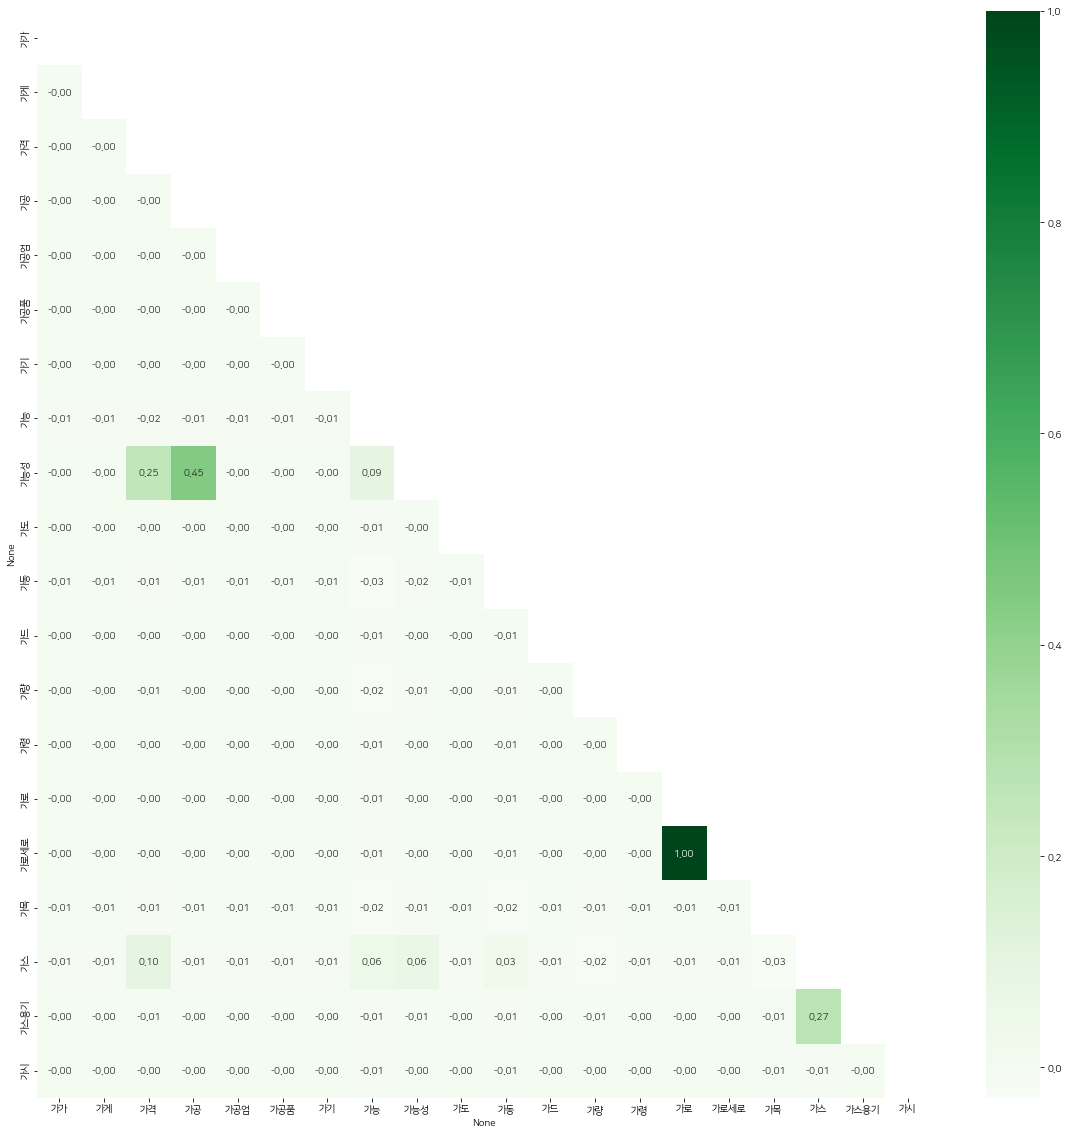

In [58]:
# 20개의 단어 시각화

top = correlation.iloc[0:20,0:20] # 10개 단어 추출

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#mask = np.triu(np.ones_like(top, dtype=np.bool))

plt.figure(figsize=(20,20))
sns.heatmap(top, annot = True, #실제 값 화면에 나타내기
            fmt=".2f",
            cmap = 'Greens', #색상
            mask=mask
          )